# **Proyecto 3:** Implementación de Metaheurísticas
## Intregantes

* Rodrigo Paz Londoño
* Sebastián Palma Mogollón
* Miguel Santiago Castillo Hernandez 


## Descripción del Problema

### Conjuntos

* Clientes  
  $$ C = \{C1, C2, C3, C4, C5, C6, ..., C24\} $$
  **indice:** $c \in C$  

* Vehículos
  $$ V = \{V1, V2, V3, V4, V5, V6, V7, V8\} $$
  **indice:** $v \in V$  

* Nodos
  $$ N = \{CD0, C1, C2, C3, C4, C5, C6, ..., C24\} $$
  **indice:** $n \in N$  

* Arcos
  $$ A = \left(i,j\right):\:i\in N,\:j\in N,\:i\ne j $$


### Parametros

* Distancia entre 2 nodos $ i $ y $ j $

$$ Dist_{i,j} $$

* Demanda de un cliente 

$$ D_i $$

* Capacidad de un vehiculo 

$$ Q $$

* Costo fijo por usar un vehiculo usado 

$$ C_{fixed} $$

* Costo variable por kilometro recorrido 

$$ C_{dist} $$

* Costo por hora de operacion

$$ C_{time} $$

* Costo de combustible por kilometro

$$ C_{fuel} $$

* Velocidad promedio del vehiculo 

$$ V $$

### Variables de decision

* $x_{v,i,j}$: Variable binaria para saber si un camión $v$ usa el arco $(i,j)$ para viajar de un lugar $i$ hasta el lugar $j$

  $$ x_{v,i,j} \ (v \in V,\ i \in N,\ j \in N),\ x_{v,i,j} \in \left[0,1\right] $$

* $y_v$: Variable binaria para saber si el vehiculo $ v $ es utilizado 
$$ y_v\left(v\in V\right),y_v\in \left[0,1\right] $$

* $u_{v,i}$: Variable entera que define el orden de los nodos por los cuales pasa el camion $ v $
$$ u_{v,i}\left(v\in V\right),u_{v,i}\in \left[1,n\right] $$


### Funcion objetivo 

$$ Min\:\sum _{v\in V}C_{fixed}\cdot y_v+\sum _{v\in V}\sum _{\left(i,j\right)\in A}C_{dist}+C_{fuel}+\frac{C_{time}}{v}\cdot Dist_{i,j}\cdot x_{v,i,j} $$

### Restricciones

* Cada cliente visitado exactamente una vez 

$$ \sum _{v\in V}\sum _{i\in N:i\ne j}x_{v,i,j}=1\: $$

* Flujo de conservacion de carga 

$$ \sum _{i\in N:i\ne n}x_{v,i,n}=\sum _{j\in N:j\ne n}x_{v,n,j} $$

* Control de la salida y entrada del deposito 

$$ \sum _{j\in C}x_{v,depot,j}=y_v\:\wedge \sum _{i\in C}x_{v,i,depot}=y_v $$

* Capacidad del vehiculo 

$$ \sum _{j\in C}D_j\cdot \sum _{i\in N:i\ne j}x_j\le Q\cdot y_v $$

* Eliminacion de subciclos 

$$ u_{v,j}\ge D_j\cdot \left(\sum _{i\in N:i\ne j}x_{v,i,j}\:\right)\wedge u_{v,j}\le \:Q\cdot \left(\sum _{i\in N:i\ne j}x_{v,i,j}\:\right)  $$


## Carga de datos

### Caso base

In [1]:
import pandas as pd

clients_CB = pd.read_csv("Proyecto_Caso_Base/clients.csv")
depots_CB = pd.read_csv("Proyecto_Caso_Base/depots.csv")
vehicles_CB = pd.read_csv("Proyecto_Caso_Base/vehicles.csv")
# usar el promedio
caps_base = vehicles_CB["Capacity"]
Q_base = int(round(caps_base.mean()))
vehicles_CB["Capacity"] = Q_base
parameters_CB = pd.read_csv("Proyecto_Caso_Base/parameters_base.csv")

print("CLIENTES")
display(clients_CB.head())

print("\n VEHICULOS")
display(vehicles_CB.head())

print("\n DEPOSITOS")
display(depots_CB.head())

print("\n PARAMETROS")
display(parameters_CB.head())


CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,2,4.597954,-74.098938,13
1,2,C002,3,4.687821,-74.075571,15
2,3,C003,4,4.709494,-74.107085,12
3,4,C004,5,4.605029,-74.097280,15
4,5,C005,6,4.648464,-74.164641,20



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,105,170
1,2,V002,105,200
2,3,V003,105,180
3,4,V004,105,90
4,5,V005,105,100



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.153536,4.743359



 PARAMETROS


,Parameter,Value,Unit,Description
0,fuel_price,16300,COP/gallon,Standard gasoline price
1,fuel_efficiency_typical,30,km/gallon,Typical vehicle fuel efficiency estimate


### Caso 2

In [2]:
clients_C2 = pd.read_csv("Proyecto_A_Caso2/clients.csv")
depots_C2_raw = pd.read_csv("Proyecto_A_Caso2/depots.csv")
depot_C2 = depots_C2_raw.drop(columns=["Capacity"]).iloc[[0]]
vehicles_C2_raw = pd.read_csv("Proyecto_A_Caso2/vehicles.csv")
vehicles_C2 = vehicles_C2_raw[["VehicleID", "StandardizedID", "Capacity", "Range"]].copy()
# promedio
caps_2 = vehicles_C2["Capacity"]
Q_2 = int(round(caps_2.mean()))
vehicles_C2["Capacity"] = Q_2
parameters_C2 = pd.read_csv("Proyecto_A_Caso2/parameters_urban.csv")

print("CLIENTES")
display(clients_C2.head())

print("\n VEHICULOS")
display(vehicles_C2.head())

print("\n DEPOSITOS")
display(depot_C2.head())

print("\n PARAMETROS")
display(parameters_C2.head())

CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,13,4.632553,-74.196992,12
1,2,C002,14,4.601328,-74.155037,15
2,3,C003,15,4.732421,-74.101787,15
3,4,C004,16,4.638612,-74.194862,6
4,5,C005,17,4.727692,-74.110272,5



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,68,145.852071
1,2,V002,68,1304.605971
2,3,V003,68,953.172609
3,4,V004,68,17.302304
4,5,V005,68,16.627680



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.081242,4.750212



 PARAMETROS


,Parameter,Value,Unit,Description
0,C_fixed,50000,COP/vehicle,Fixed activation cost per vehicle
1,C_dist,2500,COP/km,Variable cost per kilometer (maintenance and w...
2,C_time,7600,COP/hour,Urban driver hourly cost
3,fuel_price,16300,COP/gallon,Gasoline price
4,fuel_efficiency_van_small_min,35,km/gallon,Small van minimum fuel efficiency


### Caso 3

In [3]:
clients_C3_raw = pd.read_csv("Proyecto_A_Caso3/clients.csv")
clients_C3= clients_C3_raw[["ClientID", "StandardizedID", "LocationID",
                                 "Latitude", "Longitude", "Demand"]].copy()
depots_C3_raw = pd.read_csv("Proyecto_A_Caso3/depots.csv")
depot_C3 = depots_C3_raw.drop(columns=["Capacity"]).iloc[[0]]
vehicles_C3_raw = pd.read_csv("Proyecto_A_Caso3/vehicles.csv")
vehicles_C3 = vehicles_C3_raw[["VehicleID", "StandardizedID", "Capacity", "Range"]].copy()
caps_3 = vehicles_C3["Capacity"]
Q_3 = int(round(caps_3.mean()))
vehicles_C3["Capacity"] = Q_3
parameters_C3 = pd.read_csv("Proyecto_A_Caso3/parameters_urban.csv")

print("CLIENTES")
display(clients_C3.head())

print("\n VEHICULOS")
display(vehicles_C3.head())

print("\n DEPOSITOS")
display(depot_C3.head())

print("\n PARAMETROS")
display(parameters_C3.head())

CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,12,4.679769,-74.150806,13
1,2,C002,13,4.733831,-74.017996,15
2,3,C003,14,4.620928,-74.143655,16
3,4,C004,15,4.733074,-74.034583,22
4,5,C005,16,4.820900,-74.055887,14



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,83,146
1,2,V002,83,196
2,3,V003,83,143
3,4,V004,83,174
4,5,V005,83,167



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.081242,4.750212



 PARAMETROS


,Parameter,Value,Unit,Description
0,C_fixed,50000,COP/vehicle,Fixed activation cost per vehicle
1,C_dist,2500,COP/km,Variable cost per kilometer (maintenance and w...
2,C_time,7600,COP/hour,Urban driver hourly cost
3,fuel_price,16300,COP/gallon,Gasoline price
4,fuel_efficiency_van_small_min,35,km/gallon,Small van minimum fuel efficiency


### Matrices

In [4]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0  # radio de la Tierra en km
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlambda = radians(lon2 - lon1)

    a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def build_and_save_distance_matrix(clients_csv, depot_base_csv, out_csv, nombre_caso):
    clients = pd.read_csv(clients_csv)
    depots_base = pd.read_csv(depot_base_csv)
    depot_df = depots_base[["StandardizedID", "Latitude", "Longitude"]].iloc[[0]].copy()

    nodes = pd.concat(
        [
            depot_df,
            clients[["StandardizedID", "Latitude", "Longitude"]]
        ],
        ignore_index=False
    )
    nodes = (
        nodes
        .drop_duplicates(subset="StandardizedID")
        .set_index("StandardizedID")
        .sort_index()   
    )

    std_ids = nodes.index.to_list()
    n = len(std_ids)
    dist_matrix = np.zeros((n, n), dtype=float)
    for i, id_i in enumerate(std_ids):
        lat_i, lon_i = nodes.loc[id_i, ["Latitude", "Longitude"]]
        for j, id_j in enumerate(std_ids):
            lat_j, lon_j = nodes.loc[id_j, ["Latitude", "Longitude"]]
            dist_matrix[i, j] = haversine_km(lat_i, lon_i, lat_j, lon_j)

    dist_df = pd.DataFrame(dist_matrix, index=std_ids, columns=std_ids)
    dist_df.to_csv(out_csv, index=True)

    print(f"[{nombre_caso}] Matriz de distancias guardada en: {out_csv}")
    print(f"  Tamaño: {dist_df.shape[0]} nodos x {dist_df.shape[1]} nodos\n")

    return dist_df


depot_base_csv   = "Proyecto_Caso_Base/depots.csv"
clients_base_csv = "Proyecto_Caso_Base/clients.csv"
clients_C2_csv   = "Proyecto_A_Caso2/clients.csv"
clients_C3_csv   = "Proyecto_A_Caso3/clients.csv"
out_base_csv = "Proyecto_Caso_Base/dist_matrix_CB.csv"
out_C2_csv   = "Proyecto_A_Caso2/dist_matrix_C2.csv"
out_C3_csv   = "Proyecto_A_Caso3/dist_matrix_C3.csv"

# Construir matrices
dist_df_CB = build_and_save_distance_matrix(clients_base_csv, depot_base_csv, out_base_csv, "Caso Base")
dist_df_C2 = build_and_save_distance_matrix(clients_C2_csv,   depot_base_csv, out_C2_csv,   "Caso 2")
dist_df_C3 = build_and_save_distance_matrix(clients_C3_csv,   depot_base_csv, out_C3_csv,   "Caso 3")


[Caso Base] Matriz de distancias guardada en: Proyecto_Caso_Base/dist_matrix_CB.csv
  Tamaño: 25 nodos x 25 nodos

[Caso 2] Matriz de distancias guardada en: Proyecto_A_Caso2/dist_matrix_C2.csv
  Tamaño: 10 nodos x 10 nodos

[Caso 3] Matriz de distancias guardada en: Proyecto_A_Caso3/dist_matrix_C3.csv
  Tamaño: 91 nodos x 91 nodos



Leer parámetros de costos

In [5]:
def get_cost_parameters(params_df):

    def val(name):
        return float(params_df.loc[params_df["Parameter"] == name, "Value"].iloc[0])

    C_fixed = val("C_fixed")
    C_dist  = val("C_dist")
    C_time  = val("C_time")
    fuel_price   = val("fuel_price")                     # COP/gal
    fuel_eff_km  = val("fuel_efficiency_van_small_min")  # km/gal
    C_fuel_per_km = fuel_price / fuel_eff_km             # COP/km

    return C_fixed, C_dist, C_time, C_fuel_per_km



#### Función para generar gráficas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

# Funciones auxiliares
def _time_to_hours_generic(t):
    if pd.isna(t):
        return 0.0
    if isinstance(t, (int, float, np.integer, np.floating)):
        return float(t)
    t = str(t)
    if ":" in t:
        h, m = t.split(":")
        return int(h) + int(m) / 60.0
    try:
        return float(t)
    except:
        return 0.0


def _sum_demands_from_string(demand_str):
    if pd.isna(demand_str) or str(demand_str).strip() == "":
        return 0.0
    parts = str(demand_str).split(",")
    total = 0.0
    for p in parts:
        p = p.strip()  
        if ":" in p:
            _, val = p.split(":")
            try:
                total += float(val)
            except:
                pass
    return total


def _parse_demand_list(demand_str):
    demands = []
    if pd.isna(demand_str) or str(demand_str).strip() == "":
        return demands

    parts = str(demand_str).split(",")
    for p in parts:
        p = p.strip()
        if ":" in p:
            _, val = p.split(":")
            try:
                demands.append(float(val))
            except:
                pass
    return demands



def plot_verification_report(verif_csv, case_name, depots_df, clients_df, depot_id="CD01", map_html=None):

    # Cargar archivo
    verif = pd.read_csv(verif_csv)
    verif["VehicleId"] = verif["VehicleId"].astype(str)

    # Normalizar nombres de columnas 
    cols = verif.columns

    # Distancia total
    if "TotalDistance" not in cols:
        raise ValueError("La columna 'TotalDistance' no está en el archivo de verificación.")

    # Tiempo total
    time_col = "TotalTime"
    if time_col not in cols:
        raise ValueError("La columna 'TotalTime' no está en el archivo de verificación.")

    # Costos
    cost_col = None
    if "Cost" in cols:
        cost_col = "Cost"
    elif "FuelCost" in cols:
        cost_col = "FuelCost"

    # Carga inicial
    if "InitialLoad" not in cols:
        raise ValueError("La columna 'InitialLoad' no está en el archivo de verificación.")

    # Columna con carga entregada / demanda atendida
    delivered_col = None
    if "DeliveredLoad" in cols:
        delivered_col = "DeliveredLoad"
    elif "DemandsSatisfied" in cols:
        delivered_col = "DemandsSatisfied"
    elif "DemandSatisfied" in cols:
        delivered_col = "DemandSatisfied"

    # Secuencia de ruta
    if "RouteSequence" not in cols:
        raise ValueError("La columna 'RouteSequence' no está en el archivo de verificación.")

    # Tiempo en horas
    verif["TotalTimeHours"] = verif[time_col].apply(_time_to_hours_generic)

    # Carga entregada
    if delivered_col is None:
        verif["DeliveredLoad"] = 0.0
    else:
        if np.issubdtype(verif[delivered_col].dtype, np.number):
            verif["DeliveredLoad"] = verif[delivered_col].astype(float)
        else:
            verif["DeliveredLoad"] = verif[delivered_col].apply(_sum_demands_from_string)

    # GRAFICAS DE BARRAS

    x = range(len(verif))
    labels = verif["VehicleId"].astype(str).tolist()

    max_labels = 15              
    step = max(1, len(labels)//max_labels)
    ticks_to_show = list(range(0, len(labels), step))

    plt.figure(figsize=(14, 4))
    plt.bar(x, verif["TotalDistance"])
    plt.xticks(ticks_to_show,
            [labels[i] for i in ticks_to_show],
            rotation=90,
            fontsize=8)
    plt.xlabel("Vehículo")
    plt.ylabel("Distancia total [km]")
    plt.title(f"{case_name} – Distancia total recorrida por vehículo")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(14, 4))
    plt.bar(x, verif["TotalTimeHours"])
    plt.xticks(ticks_to_show,
            [labels[i] for i in ticks_to_show],
            rotation=90,
            fontsize=8)
    plt.xlabel("Vehículo")
    plt.ylabel("Tiempo total [h]")
    plt.title(f"{case_name} – Tiempo total de ruta por vehículo")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    if cost_col is not None:
        plt.figure(figsize=(14, 4))
        plt.bar(x, verif[cost_col])
        plt.xticks(ticks_to_show,
                [labels[i] for i in ticks_to_show],
                rotation=90,
                fontsize=8)
        plt.xlabel("Vehículo")
        plt.ylabel("Costo total")
        plt.title(f"{case_name} – Costo total por vehículo")
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()

    # Carga inicial vs carga entregada 
    x = range(len(verif))
    width = 0.35

    plt.figure(figsize=(14, 4))
    plt.bar([i - width/2 for i in x], verif["InitialLoad"],
            width=width, label="Carga inicial")
    plt.bar([i + width/2 for i in x], verif["DeliveredLoad"],
            width=width, label="Carga entregada")
    labels = verif["VehicleId"].astype(str).tolist()
    max_labels = 20
    step = max(1, len(labels)//max_labels)
    ticks_to_show = list(range(0, len(labels), step))

    plt.xticks(ticks_to_show,
           [labels[i] for i in ticks_to_show],
           rotation=90,          
           fontsize=8)   
    plt.xlabel("Vehículo")
    plt.ylabel("Carga [unidades de demanda]")
    plt.title(f"{case_name} – Carga inicial vs carga entregada por vehículo")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()



    # MAPA DE RUTAS
    all_nodes = pd.concat([depots_df, clients_df], ignore_index=True)

    coord_dict = {
        row["StandardizedID"]: (row["Latitude"], row["Longitude"])
        for _, row in all_nodes.iterrows()
    }

    if depot_id not in coord_dict:
        print(f"Advertencia: el depot_id '{depot_id}' no está en coord_dict. No se genera mapa.")
        return

    depot_lat, depot_lon = coord_dict[depot_id]
    m = folium.Map(location=[depot_lat, depot_lon], zoom_start=12)

    palette = ["blue", "red", "green", "purple", "orange", "darkred",
               "darkblue", "darkgreen", "cadetblue", "pink"]

    vehicle_ids = verif["VehicleId"].astype(str).unique()
    color_by_vehicle = {
        veh: palette[i % len(palette)]
        for i, veh in enumerate(sorted(vehicle_ids))
    }

    for _, row in verif.iterrows():
        veh_id    = str(row["VehicleId"])
        veh_type  = str(row.get("VehicleType", "Truck"))  
        route_str = str(row["RouteSequence"])

        if pd.isna(route_str) or route_str.strip() == "":
            continue

        nodes = [n.strip() for n in route_str.split("-")]

        coords = []
        for n in nodes:
            if n in coord_dict:
                coords.append(coord_dict[n])

        if len(coords) < 2:
            continue

        color = color_by_vehicle.get(veh_id, "gray")

        # linea
        folium.PolyLine(
            locations=coords,
            color=color,
            weight=3,
            opacity=0.8,
            tooltip=f"{veh_id} ({veh_type})"
        ).add_to(m)

        # Marcadores
        for n in nodes:
            if n not in coord_dict:
                continue
            lat, lon = coord_dict[n]
            folium.CircleMarker(
                location=[lat, lon],
                radius=3,
                color=color,
                fill=True,
                fill_opacity=0.7,
                tooltip=f"{n} – {veh_id}"
            ).add_to(m)

    # Marcador del CD
    folium.Marker(
        location=[depot_lat, depot_lon],
        popup=depot_id,
        icon=folium.Icon(color="green", icon="home")
    ).add_to(m)

    if map_html is None:
        map_html = f"mapa_rutas_{case_name.replace(' ', '_')}.html"

    m.save(map_html)
    print(f"Mapa de rutas guardado en: {map_html}")
    m

## Pyomo

In [7]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd

def build_pyomo_cvrp_projectA(dist_df, clients_df, vehicles_df, C_fixed, C_dist, C_time, C_fuel_per_km, avg_speed_kmh=50, depot_id="CD01"):


    # Conjuntos
    nodes = list(dist_df.index)
    depot = depot_id
    customers = [i for i in nodes if i != depot]

    # Vehiculos
    num_vehicles = len(vehicles_df)
    veh_ids = list(range(1, num_vehicles + 1))

    # Capacidad homogenea
    Q = float(vehicles_df["Capacity"].iloc[0])

    # Demandas por cliente 
    demand_dict = dict(zip(clients_df["StandardizedID"], clients_df["Demand"]))

    # Modelo
    m = pyo.ConcreteModel()

    m.V = pyo.Set(initialize=veh_ids)     
    m.N = pyo.Set(initialize=nodes)           
    m.C = pyo.Set(initialize=customers)      
    m.depot = depot

    # Arcos 
    m.A = pyo.Set(
        dimen=2,
        initialize=[(i, j) for i in nodes for j in nodes if i != j]
    )

    # Parametros
    # Distancias entre nodos
    def dist_init(m, i, j):
        return float(dist_df.loc[i, j])
    m.dist = pyo.Param(m.N, m.N, initialize=dist_init, within=pyo.NonNegativeReals)

    # Demandas
    def dem_init(m, c):
        return float(demand_dict[c])
    m.dem = pyo.Param(m.C, initialize=dem_init, within=pyo.NonNegativeReals)

    # Capacidad
    m.Q = pyo.Param(initialize=Q)

    # Costos de la FO 
    m.C_fixed = pyo.Param(initialize=float(C_fixed))
    m.C_dist = pyo.Param(initialize=float(C_dist))
    m.C_time = pyo.Param(initialize=float(C_time))
    m.C_fuel_km = pyo.Param(initialize=float(C_fuel_per_km))
    m.v_speed = pyo.Param(initialize=float(avg_speed_kmh))

    # Coeficiente lineal por km (distancia + tiempo + combustible)
    m.cost_per_km = pyo.Param(
        initialize=float(C_dist + C_fuel_per_km + C_time / avg_speed_kmh)
    )

    # Variables de decision
    m.x = pyo.Var(m.V, m.A, domain=pyo.Binary)

    # Si el el vehiculo se utiliza
    m.y = pyo.Var(m.V, domain=pyo.Binary)

    # Carga transportada
    m.u = pyo.Var(m.V, m.N, domain=pyo.NonNegativeReals, bounds=(0, Q))

    # FO
    def obj_rule(m):
        # Parte fija
        fixed_cost = sum(m.C_fixed * m.y[v] for v in m.V)

        # Parte variable 
        variable_cost = sum(
            m.cost_per_km * m.dist[i, j] * m.x[v, (i, j)]
            for v in m.V
            for (i, j) in m.A
        )
        return fixed_cost + variable_cost

    m.OBJ = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

    # Restricciones

    # Cada cliente se atiende exactamente una vez
    def customer_served_once(m, c):
        return sum(m.x[v, (i, c)] for v in m.V for i in m.N if i != c) == 1
    m.VisitOnce = pyo.Constraint(m.C, rule=customer_served_once)

    # Flujo de conservacion
    def flow_conservation(m, v, n):
        return (
            sum(m.x[v, (i, n)] for i in m.N if (i, n) in m.A)
            ==
            sum(m.x[v, (n, j)] for j in m.N if (n, j) in m.A)
        )
    m.Flow = pyo.Constraint(m.V, m.N, rule=flow_conservation)

    # Salidas y entradas al deposito
    def depot_out(m, v):
        return sum(m.x[v, (depot, j)] for j in m.C) == m.y[v]
    m.DepotOut = pyo.Constraint(m.V, rule=depot_out)

    def depot_in(m, v):
        return sum(m.x[v, (i, depot)] for i in m.C) == m.y[v]
    m.DepotIn = pyo.Constraint(m.V, rule=depot_in)

    # Restricciones de capacidad
    for v in m.V:
        for c in m.C:
            # Cota superior por capacidad
            m.u[v, c].setub(Q)

    # Carga minimsa
    def load_lower_bound(m, v, c):
        return m.u[v, c] >= m.dem[c]
    m.LoadLB = pyo.Constraint(m.V, m.C, rule=load_lower_bound)

    # MTZ
    def mtz_rule(m, v, i, j):
        if i == j or i == depot or j == depot:
            return pyo.Constraint.Skip
        return m.u[v, j] >= m.u[v, i] + m.dem[j] - m.Q * (1 - m.x[v, (i, j)])
    m.MTZ = pyo.Constraint(m.V, m.C, m.C, rule=mtz_rule)

    def use_vehicle_link(m, v):
        big_M = len(m.C)  # máximo arcos que podría usar un vehículo
        return sum(m.x[v, (i, j)] for (i, j) in m.A) <= big_M * m.y[v]
    m.UseLink = pyo.Constraint(m.V, rule=use_vehicle_link)

    return m


In [8]:
def compute_route_distance(route_nodes, dist_df, depot):
    if not route_nodes:
        return 0.0

    d = dist_df.loc[depot, route_nodes[0]]
    for i in range(len(route_nodes) - 1):
        d += dist_df.loc[route_nodes[i], route_nodes[i + 1]]
    d += dist_df.loc[route_nodes[-1], depot]
    return float(d)


def build_verification_from_pyomo(model, dist_df, clients_df, vehicles_df,
                                  depot_id, C_fuel_per_km, avg_speed_kmh=50.0):

    depot = depot_id

    vehicle_ids = list(vehicles_df["StandardizedID"])
    capacities  = list(vehicles_df["Capacity"])
    demand_dict = dict(zip(clients_df["StandardizedID"], clients_df["Demand"]))

    rows = []

    for v in sorted(model.V):  
        idx = v - 1
        veh_label = vehicle_ids[idx]
        init_load = float(capacities[idx])

        arcs_v = [(i, j) for (i, j) in model.A
                  if pyo.value(model.x[v, (i, j)]) > 0.5]
        
        route_nodes = []
        if arcs_v:
            succ = {i: j for (i, j) in arcs_v}
            current = depot
            while True:
                if current not in succ:
                    break
                nxt = succ[current]
                if nxt == depot:
                    break
                route_nodes.append(nxt)
                current = nxt

        clients_served = len(route_nodes)
        demand_satisfied = sum(demand_dict[c] for c in route_nodes)

        total_dist = compute_route_distance(route_nodes, dist_df, depot)
        total_time = total_dist / avg_speed_kmh if avg_speed_kmh > 0 else 0.0
        fuel_cost  = C_fuel_per_km * total_dist

        if route_nodes:
            route_seq = "-".join([depot] + route_nodes + [depot])
        else:
            route_seq = f"{depot}-{depot}"

        rows.append({
            "VehicleId": veh_label,
            "DepotId": depot,
            "InitialLoad": init_load,
            "RouteSequence": route_seq,
            "ClientsServed": clients_served,
            "DemandsSatisfied": demand_satisfied,
            "TotalDistance": round(total_dist, 1),
            "TotalTime": round(total_time, 1),
            "FuelCost": round(fuel_cost, 0)
        })

    verif_df = pd.DataFrame(rows)
    return verif_df



### Resolver Modelo

#### Caso base

Read LP format model from file C:\Users\usuario\AppData\Local\Temp\tmpn1srbxhx.pyomo.lp
Reading time = 0.05 seconds
x1: 4856 rows, 5000 columns, 32856 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Academic license 2741129 - for non-commercial use only - registered to r.___@uniandes.edu.co
Optimize a model with 4856 rows, 5000 columns and 32856 nonzeros (Min)
Model fingerprint: 0xcfcfa101
Model has 4808 linear objective coefficients
Variable types: 192 continuous, 4808 integer (4808 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+03, 8e+04]
  Bounds range     [1e+00, 1e+02]
  RHS range        [1e+00, 1e+02]
Presolv

,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,105.0,CD01-C024-C005-C023-CD01,3,46,42.6,0.9,19848.0
1,V002,CD01,105.0,CD01-C022-C010-C013-CD01,3,54,45.0,0.9,20970.0
2,V003,CD01,105.0,CD01-C011-C016-C021-CD01,3,41,62.8,1.3,29264.0
3,V004,CD01,105.0,CD01-C003-C006-CD01,2,29,21.6,0.4,10055.0
4,V005,CD01,105.0,CD01-C020-C009-CD01,2,35,34.8,0.7,16220.0
5,V006,CD01,105.0,CD01-C008-C018-C015-CD01,3,49,39.5,0.8,18390.0
6,V007,CD01,105.0,CD01-C012-C004-CD01,2,27,39.4,0.8,18339.0
7,V008,CD01,105.0,CD01-C019-C002-C017-C014-C001-C007-CD01,6,96,81.5,1.6,37941.0


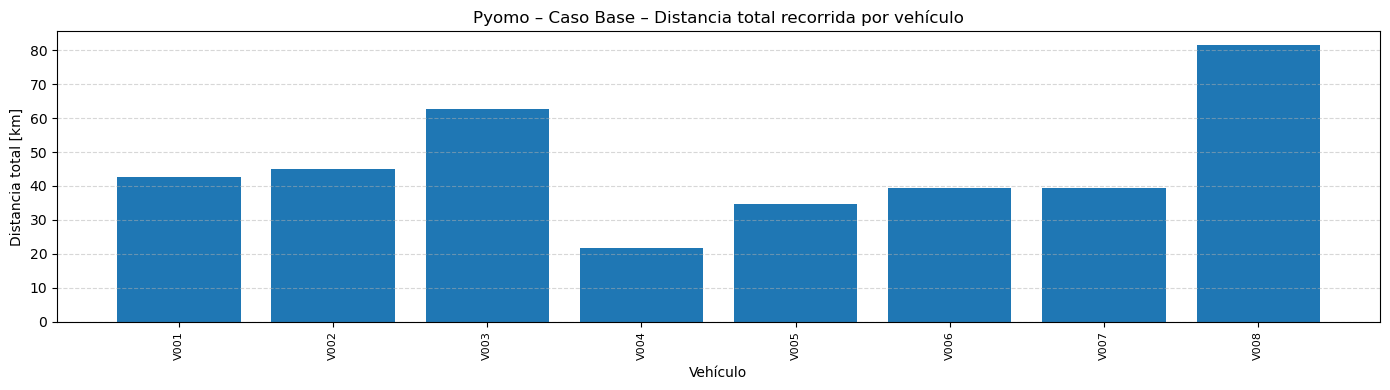

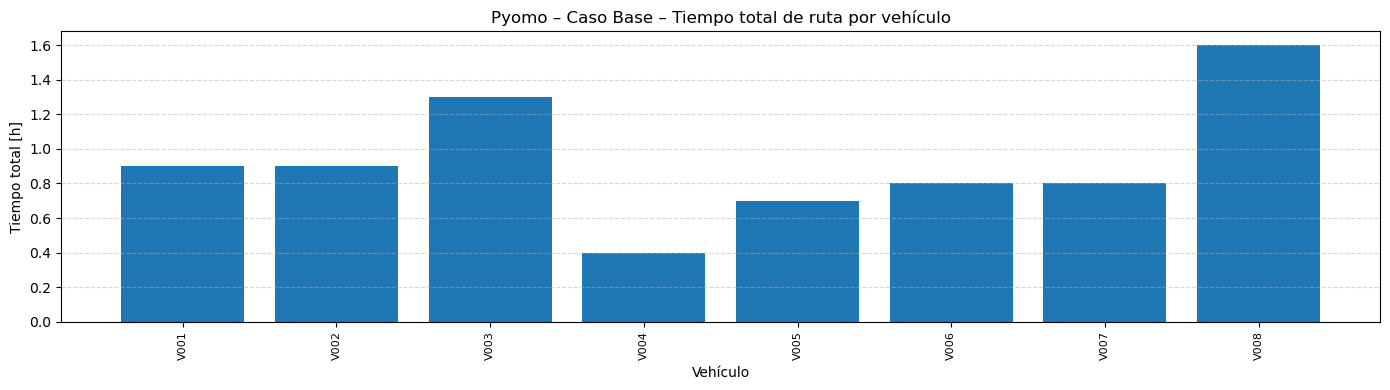

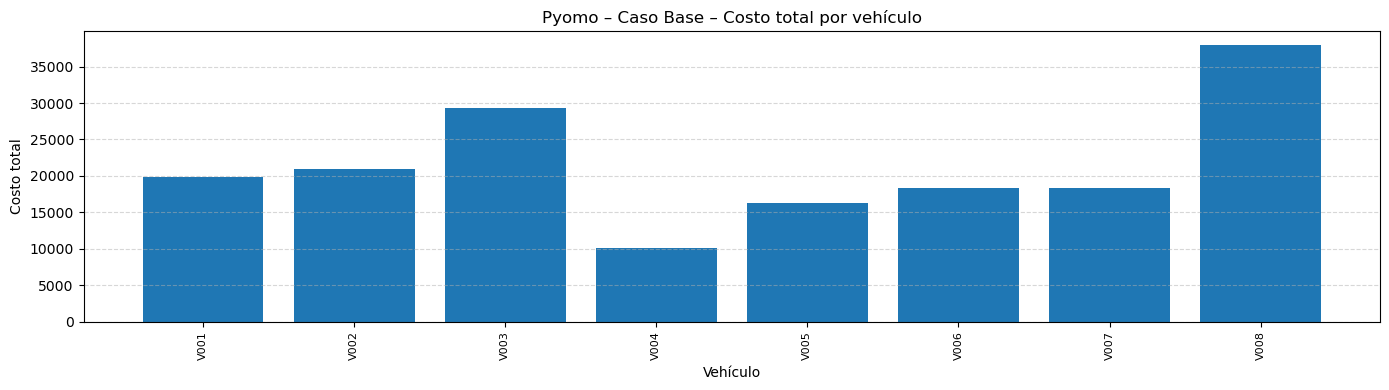

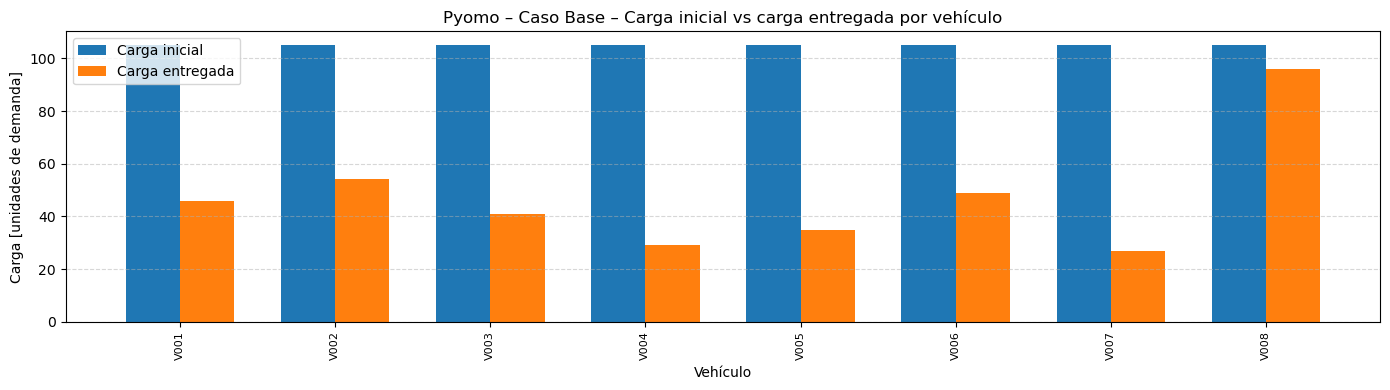

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_base.html


In [9]:
import pyomo.environ as pyo
import pandas as pd


depot_id_CB = depots_CB["StandardizedID"].iloc[0]
C_fixed_CB, C_dist_CB, C_time_CB, C_fuel_CB = get_cost_parameters(parameters_C2)

model_CB = build_pyomo_cvrp_projectA(
    dist_df=dist_df_CB,
    clients_df=clients_CB,
    vehicles_df=vehicles_CB,
    C_fixed=C_fixed_CB,
    C_dist=C_dist_CB,
    C_time=C_time_CB,
    C_fuel_per_km=C_fuel_CB,
    avg_speed_kmh=50,
    depot_id=depot_id_CB
)

solver_CB = pyo.SolverFactory("gurobi")
solver_CB.options['TimeLimit'] = 1200
solver_CB.options['MIPGap']   = 0.01 
results_CB = solver_CB.solve(model_CB, tee=True)
print(results_CB.solver.status, results_CB.solver.termination_condition)

verificacion_CB = build_verification_from_pyomo(
    model=model_CB,
    dist_df=dist_df_CB,
    clients_df=clients_CB,
    vehicles_df=vehicles_CB,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_CB,
    avg_speed_kmh=50.0
)

verificacion_CB = verificacion_CB[verificacion_CB["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_CB)
verificacion_CB.to_csv("verificacion_caso_base.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso_base.csv",
    case_name="Pyomo – Caso Base",
    depots_df=depots_CB,     
    clients_df=clients_CB,    
    depot_id=depot_id_CB,    
    map_html="mapa_rutas_Pyomo_caso_base.html"
)

#### Caso 2

Read LP format model from file C:\Users\sebas\AppData\Local\Temp\tmpnzbqjtxw.pyomo.lp
Reading time = 0.01 seconds
x1: 573 rows, 600 columns, 3582 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13650HX, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Optimize a model with 573 rows, 600 columns and 3582 nonzeros
Model fingerprint: 0x8dabe33c
Variable types: 54 continuous, 546 integer (546 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [2e+03, 6e+04]
  Bounds range     [1e+00, 7e+01]
  RHS range        [1e+00, 6e+01]
Presolve removed 54 rows and 0 columns
Presolve time: 0.01s
Presolved: 519 rows, 600 columns, 6079 nonzeros
Variable types: 54 continuous, 546 integer (546 binary)


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V003,CD01,68.0,CD01-C006-C004-C001-C002-C009-CD01,5,59,41.6,0.8,19380.0
1,V004,CD01,68.0,CD01-C005-C007-C008-C003-CD01,4,42,31.2,0.6,14513.0


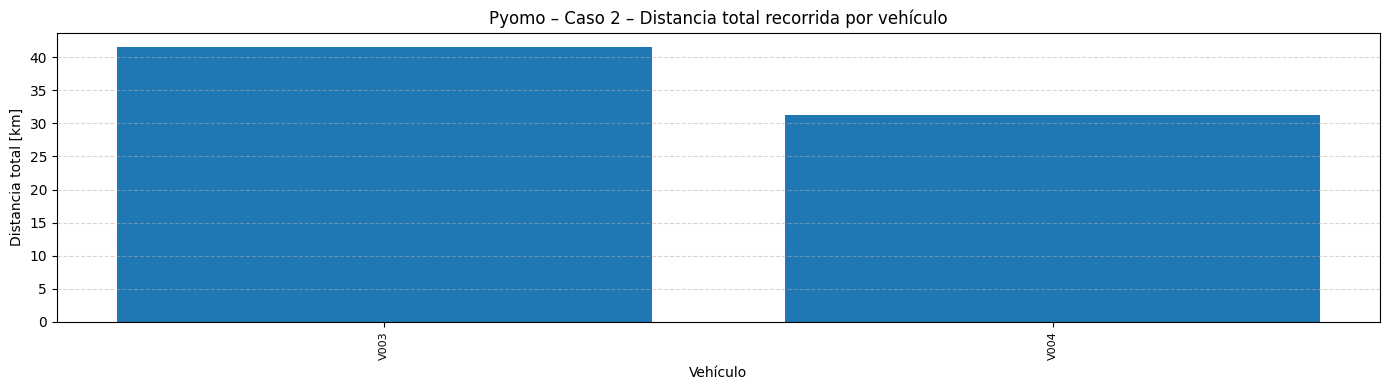

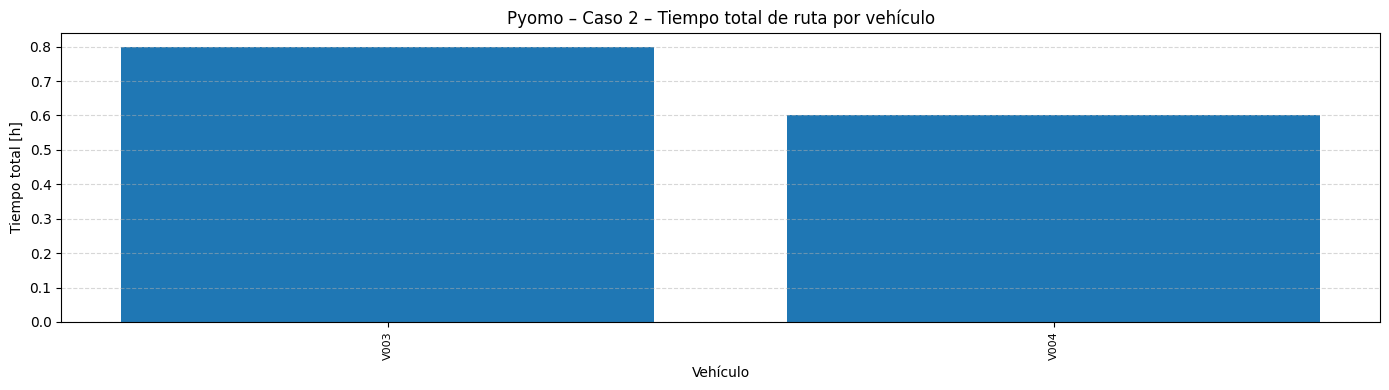

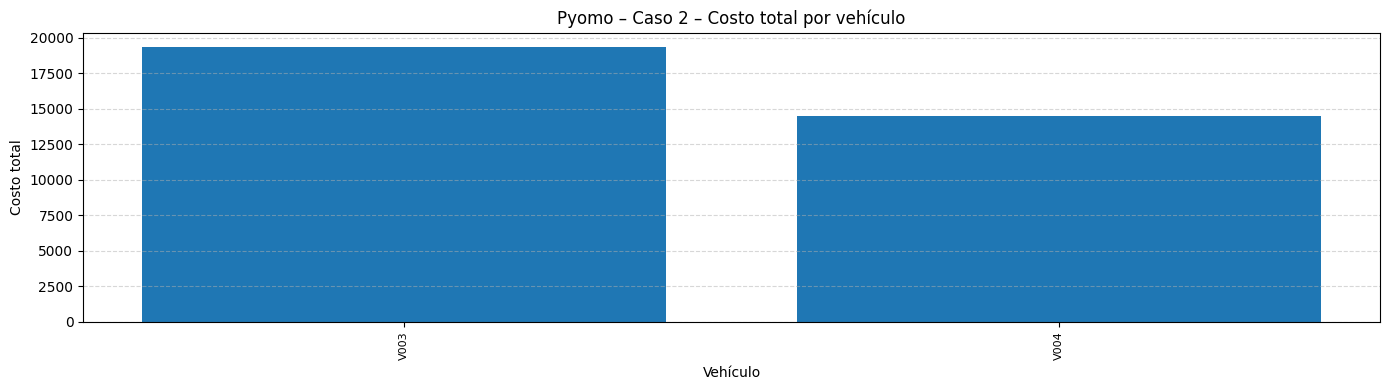

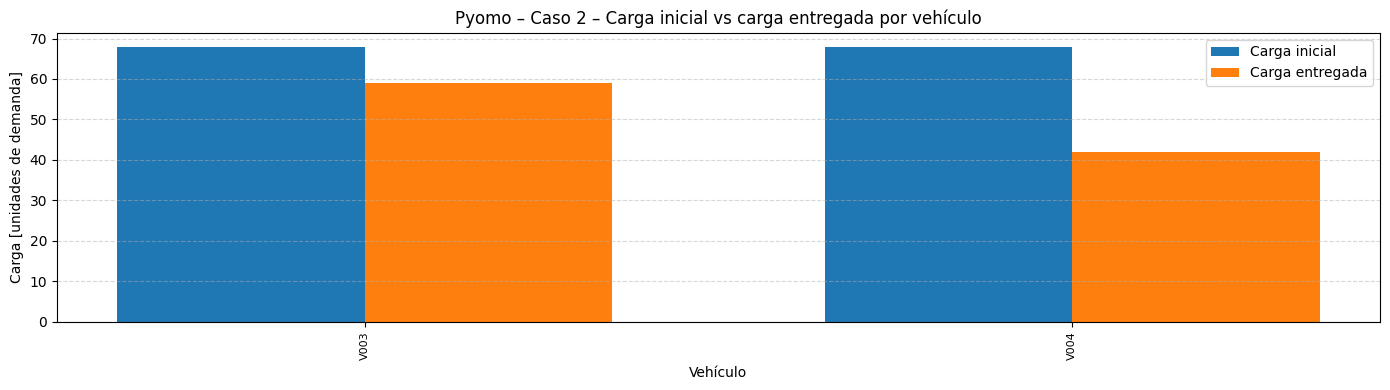

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_2.html


In [ ]:
C_fixed_C2, C_dist_C2, C_time_C2, C_fuel_C2 = get_cost_parameters(parameters_C2)

model_C2 = build_pyomo_cvrp_projectA(
    dist_df=dist_df_C2,
    clients_df=clients_C2,
    vehicles_df=vehicles_C2,
    C_fixed=C_fixed_C2,
    C_dist=C_dist_C2,
    C_time=C_time_C2,
    C_fuel_per_km=C_fuel_C2,
    avg_speed_kmh=50,
    depot_id=depot_id_CB
)


solver_C2 = pyo.SolverFactory("gurobi")
solver_C2.options['TimeLimit'] = 1200 
solver_C2.options['MIPGap']   = 0.01 
results_C2 = solver_C2.solve(model_C2, tee=True)
print(results_C2.solver.status, results_C2.solver.termination_condition)

verificacion_C2 = build_verification_from_pyomo(
    model=model_C2,
    dist_df=dist_df_C2,
    clients_df=clients_C2,
    vehicles_df=vehicles_C2,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_C2,
    avg_speed_kmh=50.0
)

verificacion_C2 = verificacion_C2[verificacion_C2["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_C2)
verificacion_C2.to_csv("verificacion_caso2.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso2.csv",
    case_name="Pyomo – Caso 2",
    depots_df=depot_C2,     
    clients_df=clients_C2,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Pyomo_caso_2.html"
)

#### Caso 3

Read LP format model from file C:\Users\sebas\AppData\Local\Temp\tmpf7pal8jr.pyomo.lp
Reading time = 1.27 seconds
x1: 368820 rows, 372645 columns, 2563785 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13650HX, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Optimize a model with 368820 rows, 372645 columns and 2563785 nonzeros
Model fingerprint: 0x85e5221e
Variable types: 4050 continuous, 368595 integer (368595 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [2e+02, 1e+05]
  Bounds range     [1e+00, 8e+01]
  RHS range        [1e+00, 8e+01]
Presolve removed 4095 rows and 0 columns
Presolve time: 2.60s
Presolved: 364725 rows, 372645 columns, 2543580 nonzeros
Variable types: 405

,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,83.0,CD01-C011-C078-C021-C029-C049-C009-CD01,6,72,27.4,0.5,12780.0
1,V008,CD01,83.0,CD01-C042-C076-C065-C019-C064-CD01,5,60,33.5,0.7,15608.0
2,V010,CD01,83.0,CD01-C005-C031-C077-C058-C023-C034-CD01,6,73,58.1,1.2,27078.0
3,V012,CD01,83.0,CD01-C057-C043-C082-C081-C041-C040-C061-CD01,7,81,40.7,0.8,18966.0
4,V014,CD01,83.0,CD01-C090-C072-C010-C050-C001-CD01,5,74,35.1,0.7,16326.0
5,V017,CD01,83.0,CD01-C039-C030-C085-C038-C044-C062-CD01,6,72,28.8,0.6,13391.0
6,V020,CD01,83.0,CD01-C003-C022-C018-C053-C080-C089-CD01,6,80,49.7,1.0,23137.0
7,V022,CD01,83.0,CD01-C069-C012-C020-C063-C067-C074-CD01,6,78,34.5,0.7,16076.0
8,V024,CD01,83.0,CD01-C007-C004-C066-C002-C047-C006-CD01,6,81,37.2,0.7,17311.0
9,V026,CD01,83.0,CD01-C014-C024-C035-C084-C015-CD01,5,60,39.4,0.8,18333.0


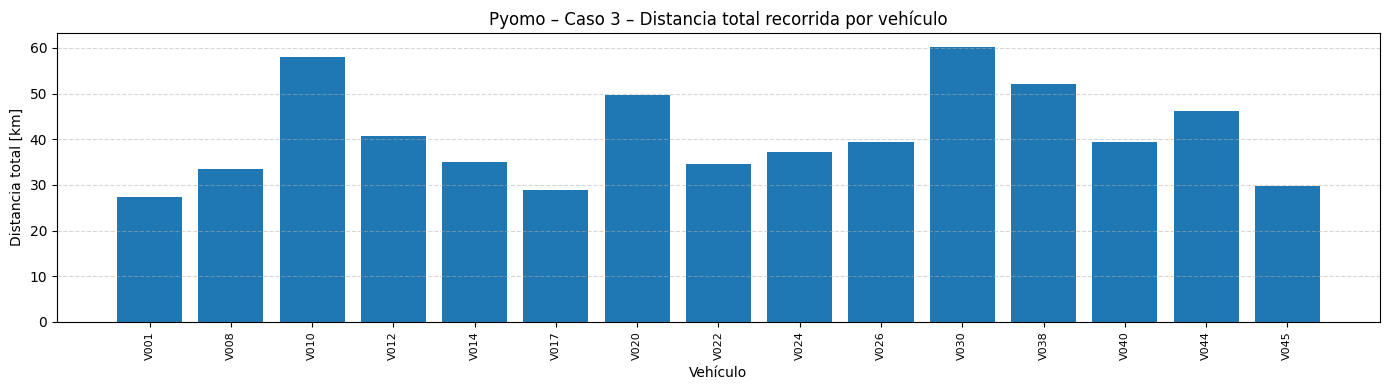

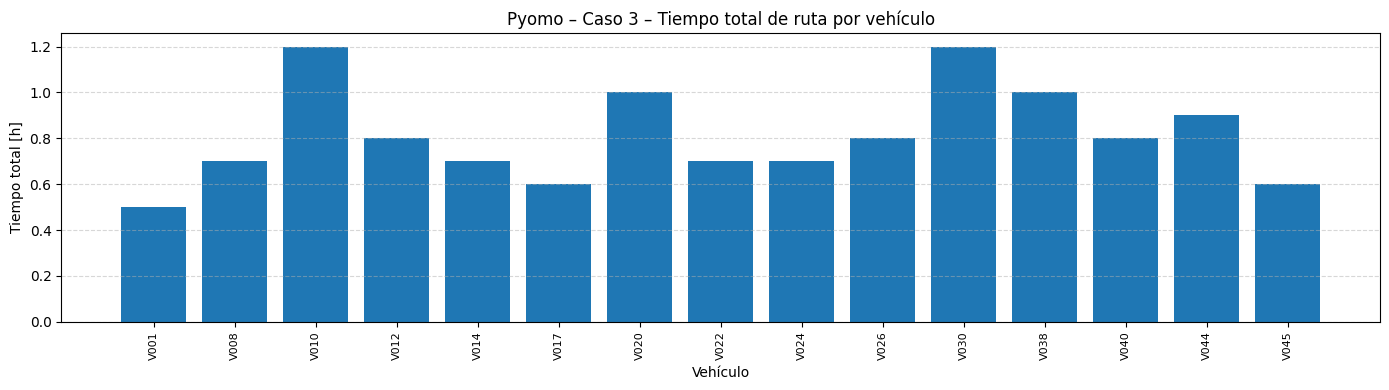

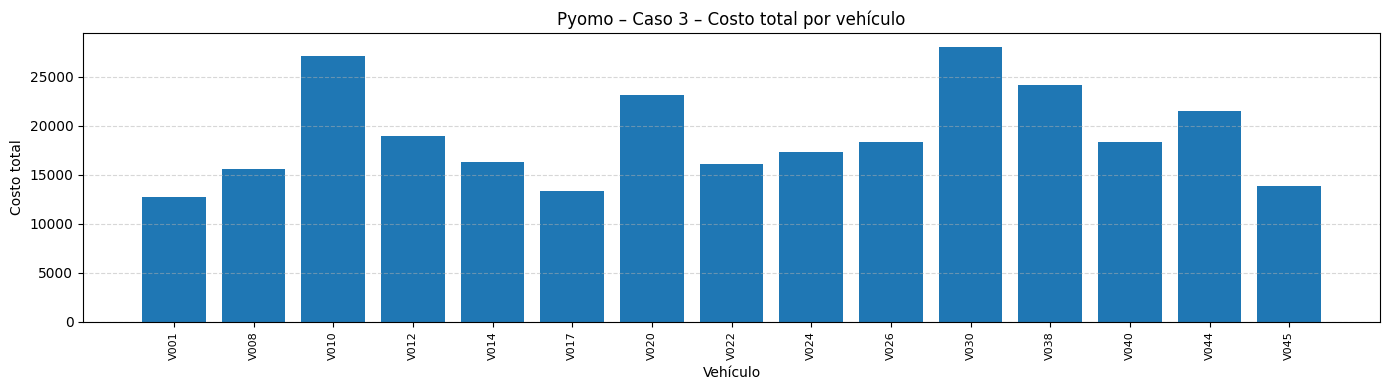

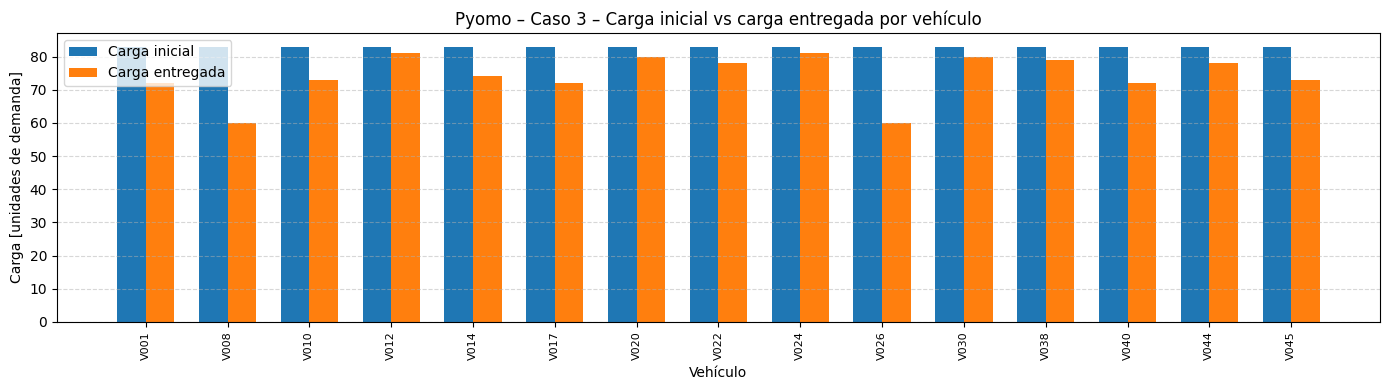

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_3.html


In [ ]:
C_fixed_C3, C_dist_C3, C_time_C3, C_fuel_C3 = get_cost_parameters(parameters_C3)

model_C3 = build_pyomo_cvrp_projectA(
    dist_df=dist_df_C3,
    clients_df=clients_C3,
    vehicles_df=vehicles_C3,
    C_fixed=C_fixed_C3,
    C_dist=C_dist_C3,
    C_time=C_time_C3,
    C_fuel_per_km=C_fuel_C3,
    avg_speed_kmh=50,
    depot_id=depot_id_CB  
)

solver_C3 = pyo.SolverFactory("gurobi")
solver_C3.options['TimeLimit'] = 1200  
solver_C3.options['MIPGap']   = 0.01 
results_C3 = solver_C3.solve(model_C3, tee=True)
print(results_C3.solver.status, results_C3.solver.termination_condition)


verificacion_C3 = build_verification_from_pyomo(
    model=model_C3,
    dist_df=dist_df_C3,
    clients_df=clients_C3,
    vehicles_df=vehicles_C3,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_C3,
    avg_speed_kmh=50.0
)

verificacion_C3 = verificacion_C3[verificacion_C3["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_C3)
verificacion_C3.to_csv("verificacion_caso3.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso3.csv",
    case_name="Pyomo – Caso 3",
    depots_df=depot_C3,     
    clients_df=clients_C3,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Pyomo_caso_3.html"
)

## Metodo Metaheurístico: Algoritmo Genético

### Adaptación del algoritmo genético de referencia al CVRP del proyecto

A partir del algoritmo genético entregado se construyó un GA específico para el CVRP con un solo depósito y flota homogénea.

#### 1. Representación de soluciones

En el algoritmo de referencia, una solución TSP se representa como una permutación de clientes y, en la versión MTSP, como una lista de rutas, una por viajero. El depósito no aparece explícitamente en el cromosoma y se supone que cada ruta comienza y termina allí. Para el CVRP se mantuvo esta idea, pero reinterpretada:

- Cada individuo de la población es una lista de rutas, donde cada ruta corresponde a un vehículo de la flota.
- En cada ruta aparecen únicamente los identificadores de los clientes. El depósito del proyecto se mantiene implícito y se añade solo cuando se calcula el costo.
- Los clientes se distribuyen entre las rutas de forma aleatoria pero balanceada en la inicialización, para que todos los vehículos tengan, en principio, una carga similar. Sobre esas rutas iniciales se aplica una pequeña mejora local tipo 2-opt, que busca reducir la distancia interna de cada ruta sin destruir la diversidad de la población.


#### 2. Función de evaluación

En el TSP/MTSP original el fitness era simplemente la suma de distancias recorridas en las rutas. Para el CVRP del proyecto la función de evaluación se amplió para incorporar los componentes económicos y las restricciones de capacidad:

1. **Distancia de múltiples rutas**  
   Para cada vehículo se calcula la distancia del recorrido completo: desde el depósito hasta el primer cliente de la ruta, entre cada par de clientes consecutivos y del último cliente de vuelta al depósito. Así, la distancia total de la solución es la suma de las distancias de todas las rutas.

2. **Costos fijos y variables**  
   A partir del archivo de parametros se extraen las variables necesarias. De estas se deduce un costo monetario por kilómetro de combustible. Para cada ruta se construye entonces un costo total que combina:
   - Costo fijo del vehículo.
   - Costo variable por distancia.
   - Costo por tiempo. 
   - Costo de combustible.

   El fitness de una solución es la suma de los costos de todas las rutas.

3. **Penalización por violar la capacidad**  
   Además de los costos económicos, se calcula la carga atendida por cada ruta: 
   - Si la carga supera la capacidad \(Q\), se aplica una penalización proporcional al
     exceso, con un coeficiente grande.  
   - Esto hace que el algoritmo prefiera soluciones factibles y, en caso de comparar
     dos soluciones con costos similares, descarte la que viole la capacidad.



#### 3. Operadores genéticos

En la adaptación se hizo lo siguiente:

- **Selección**  
  Se mantiene la selección por torneo del algoritmo original, donde a partir de un subconjunto aleatorio de individuos se elige el de menor costo. Esto favorece soluciones buenas, pero mantiene diversidad.

- **Cruce basado en rutas**  
  Se usan dos esquemas complementarios:
  1. **Intercambio de rutas completas**: se elige al azar un subconjunto de rutas y se intercambian entre dos padres. Esto permite “copiar” patrones de asignación de clientes a vehículos que ya funcionan bien.
  2. **Fusión/mezcla de rutas**: para cada posición de vehículo se combinan segmentos de la ruta del padre 1 y del padre 2, obteniendo rutas hijas que mezclan partes de ambos. Con esto se exploran nuevas combinaciones internas en las rutas sin perder por completo la estructura heredada.

- **Mutaciones específicas para CVRP**  
  Para mantener diversidad y explorar el espacio de soluciones se implementan varias
  mutaciones:
  - Intercambio de dos clientes dentro de una ruta, que modifica el orden de visita sin cambiar la asignación de clientes a vehículos.
  - Inserción de un cliente en otra posición de la misma ruta, que puede reducir la distancia al ajustar el orden de visita.
  - Inversión de un segmento de la ruta, que mejora localmente la estructura de la ruta.
  - Redistribución de clientes entre rutas. Esto mueve un cliente de la ruta de un vehículo a la de otro. Este operador es clave para CVRP porque permite explorar distintas asignaciones de clientes a vehículos y ayuda a corregir posibles sobrecargas en determinadas rutas.

En conjunto, estos operadores respetan la idea del algoritmo original pero añaden
movimientos que trabajan con la estructura multi-vehículo del CVRP.


#### 4. Reparación de soluciones

Se indica que, si una ruta excede la capacidad, debe dividirse o reasignar clientes, e invita a implementar una heurística de inserción para mantener factibilidad. La adaptación incorpora una fase de reparación que actúa después de los cruces y mutaciones:

1. **Garantizar unicidad de visita**  
   Primero se reconstruye la solución para que cada cliente aparezca como máximo una vez (se eliminan ocurrencias duplicadas dejando la
     primera), y aparezca al menos una vez (los clientes que no están en ninguna ruta se insertan en las rutas con menor número de clientes). Esta inserción balanceada sirve como heurística simple para repartir carga entre vehículos.

2. **Reparación de capacidad**  
   Se identifica:
   - Qué rutas están sobrecargadas (carga > \(Q\)).
   - Cuáles tienen capacidad ociosa.
   - Cuáles están vacías.  
   Mientras existan rutas sobrecargadas y vehículos con holgura, se realiza un proceso iterativo: se toma un cliente de alta demanda de una ruta sobrecargada, se lo mueve a una ruta con más capacidad disponible o a un vehículo vacío y se actualizan las cargas y se repite el procedimiento.  

   Este mecanismo implementa, en la práctica, la idea de dividir o reasignar rutas para respetar la capacidad, antes incluso de recurrir a la penalización en la función de evaluación.

Gracias a esta combinación de reparación estructural y de capacidad, el GA tiende a trabajar con soluciones factibles o cercanas a la factibilidad, lo que acelera la convergencia hacia ruteos que respetan tanto la asignación de clientes como las limitaciones de la flota.


In [10]:
import pandas as pd


def build_idx_to_label_map(dist_df):
    labels = list(dist_df.index)           # [CD01, C001, C002, ...]
    idx_to_label = {i + 1: lab for i, lab in enumerate(labels)}
    return idx_to_label


def build_verification_from_ga(ga,
                               idx_to_label,
                               vehicles_df,
                               depot_label,
                               avg_speed_kmh=None):

    if ga.best_solution is None:
        raise ValueError("El GA aún no tiene solución.")

    if avg_speed_kmh is None:
        avg_speed_kmh = ga.avg_speed_kmh

    rows = []

    for v_idx, route in enumerate(ga.best_solution, start=1):
        veh_row   = vehicles_df.iloc[v_idx - 1]
        veh_label = veh_row["StandardizedID"]
        init_load = float(veh_row["Capacity"])

        route_labels = [idx_to_label[i] for i in route]
        total_dist = ga._route_distance(route)               
        total_time = total_dist / avg_speed_kmh if avg_speed_kmh > 0 else 0.0
        fuel_cost  = ga.C_fuel_per_km * total_dist

        clients_served    = len(route)
        demand_satisfied  = sum(ga.demands.get(i, 0.0) for i in route)

        if route_labels:
            route_seq = "-".join([depot_label] + route_labels + [depot_label])
        else:
            route_seq = f"{depot_label}-{depot_label}"

        rows.append({
            "VehicleId":        veh_label,
            "DepotId":          depot_label,
            "InitialLoad":      init_load,
            "RouteSequence":    route_seq,
            "ClientsServed":    clients_served,
            "DemandsSatisfied": demand_satisfied,
            "TotalDistance":    round(total_dist, 1),
            "TotalTime":        round(total_time, 1),
            "FuelCost":         round(fuel_cost, 0)
        })

    verif_df = pd.DataFrame(rows)
    return verif_df


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
from collections import defaultdict
from copy import deepcopy

class GeneticAlgorithmCVRP:

    def __init__(self, cost_matrix, demands, vehicle_capacity, num_customers, num_vehicles, C_fixed, C_dist, C_time, C_fuel_per_km, 
                 depots=None, population_size=100, generations=500, mutation_rate=0.2, crossover_rate=0.8, elitism_rate=0.1, tournament_size=5, 
                 avg_speed_kmh=50, capacity_penalty=1e4  
    ):
        self.cost_matrix = np.array(cost_matrix)
        self.num_nodes = int(num_customers)
        self.num_vehicles = int(num_vehicles)
        self.depots = list(depots)

        self.non_depots = [i for i in range(1, self.num_nodes + 1)
                           if i not in self.depots]

        if isinstance(demands, dict):
            self.demands = {int(k): float(v) for k, v in demands.items()}
        else:
            self.demands = {int(idx): float(val)
                            for idx, val in dict(demands).items()}

        self.Q = float(vehicle_capacity)

        # Hiperparametros GA
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size

        # Coeficientes de costo
        self.C_fixed = float(C_fixed)
        self.C_dist = float(C_dist)
        self.C_time = float(C_time)
        self.C_fuel_per_km = float(C_fuel_per_km)
        self.avg_speed_kmh = float(avg_speed_kmh)
        self.capacity_penalty = float(capacity_penalty)

        # Resultados
        self.population = []
        self.best_solution = None
        self.best_fitness = float("inf")
        self.fitness_history = []
        self.best_solution_history = []

    # Inicializacion
    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            sol = self._create_random_solution()
            population.append(sol)
        self.population = population
        return population

    def _create_random_solution(self):
        cities = self.non_depots.copy()
        random.shuffle(cities)

        routes = [[] for _ in range(self.num_vehicles)]

        if random.random() < 0.5:
            base = len(cities) // self.num_vehicles
            rem = len(cities) % self.num_vehicles
            start = 0
            for k in range(self.num_vehicles):
                extra = 1 if k < rem else 0
                end = start + base + extra
                routes[k] = cities[start:end]
                start = end
        else:
            min_cities = min(1, len(cities) // self.num_vehicles) if self.num_vehicles > 0 else 0
            for k in range(self.num_vehicles):
                if len(cities) >= min_cities:
                    routes[k] = cities[:min_cities]
                    cities = cities[min_cities:]
            while cities:
                k = random.randint(0, self.num_vehicles - 1)
                routes[k].append(cities.pop(0))

        for k in range(self.num_vehicles):
            if len(routes[k]) > 3:
                routes[k] = self._random_2opt(routes[k])

        return routes

    def _random_2opt(self, route, iterations=5):
        best_route = route.copy()
        best_cost = self._route_cost(best_route)

        for _ in range(iterations):
            if len(best_route) < 4:
                break
            i, j = sorted(random.sample(range(len(best_route)), 2))
            new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]
            new_cost = self._route_cost(new_route)
            if new_cost < best_cost:
                best_route, best_cost = new_route, new_cost

        return best_route

    # Cargas y costos
    def _route_load(self, route):
        return sum(self.demands.get(c, 0.0) for c in route)

    def _route_distance(self, route):
        if not route:
            return 0.0
        depot = self.depots[0]
        dist = self.cost_matrix[depot-1, route[0]-1]
        for i in range(len(route) - 1):
            dist += self.cost_matrix[route[i]-1, route[i+1]-1]
        dist += self.cost_matrix[route[-1]-1, depot-1]
        return float(dist)

    def _route_time(self, distance):
        if self.avg_speed_kmh <= 0:
            return 0.0
        return distance / self.avg_speed_kmh

    def _route_cost(self, route):
        if not route:
            return 0.0

        d = self._route_distance(route)
        t = self._route_time(d)
        fuel_cost = self.C_fuel_per_km * d

        variable = self.C_dist * d + self.C_time * t + fuel_cost
        return self.C_fixed + variable

    def evaluate_fitness(self, solution):
        total_cost = 0.0
        penalty = 0.0

        for route in solution:
            total_cost += self._route_cost(route)
            load = self._route_load(route)
            if load > self.Q:
                excess = load - self.Q
                penalty += self.capacity_penalty * excess

        return total_cost + penalty


    # Reparacion
    def _repair_solution(self, solution):
        included = []
        for r in solution:
            included.extend(r)

        city_pos = defaultdict(list)
        for r_idx, r in enumerate(solution):
            for pos, city in enumerate(r):
                city_pos[city].append((r_idx, pos))

        duplicates = {c: pos for c, pos in city_pos.items() if len(pos) > 1}
        missing = [c for c in self.non_depots if c not in included]

        to_remove = []
        for c, positions in duplicates.items():
            for r_idx, pos in positions[1:]:
                to_remove.append((r_idx, pos))
        to_remove.sort(reverse=True)
        for r_idx, pos in to_remove:
            solution[r_idx].pop(pos)

        random.shuffle(missing)
        for city in missing:
            sizes = [(i, len(r)) for i, r in enumerate(solution)]
            r_idx = min(sizes, key=lambda x: x[1])[0]
            insert_pos = random.randint(0, len(solution[r_idx]))
            solution[r_idx].insert(insert_pos, city)

        solution = self._repair_capacity(solution)
        return solution

    def _repair_capacity(self, solution):
        routes = deepcopy(solution)
        loads = [self._route_load(r) for r in routes]

        for v in range(self.num_vehicles):
            while loads[v] > self.Q and routes[v]:

                # Extraer ciudad mss demandante
                idx_city = max(range(len(routes[v])),
                            key=lambda idx: self.demands.get(routes[v][idx], 0.0))

                city = routes[v].pop(idx_city)
                demand_city = self.demands[city]
                loads[v] -= demand_city

                # Buscar mejor vehiculo receptor
                best_v = None
                best_space = -1

                for k in range(self.num_vehicles):
                    space = self.Q - loads[k]
                    if space >= demand_city and space > best_space:
                        best_space = space
                        best_v = k

                # Si ninguno cabe manda al vehículo mas vacio (sin importar si se sobrecarga)
                if best_v is None:
                    best_v = min(range(self.num_vehicles), key=lambda k: loads[k])

                routes[best_v].append(city)
                loads[best_v] += demand_city

        return routes

    # Seleccion, crossover y mutacion 

    def select_parents(self):
        def tournament():
            participants = random.sample(range(len(self.population)), self.tournament_size)
            fits = [(p, self.evaluate_fitness(self.population[p])) for p in participants]
            winner_idx = min(fits, key=lambda x: x[1])[0]
            return self.population[winner_idx]
        return tournament(), tournament()

    def _remove_duplicates(self, route):
        seen, res = set(), []
        for c in route:
            if c not in seen:
                seen.add(c)
                res.append(c)
        return res

    def _route_exchange_crossover(self, p1, p2):
        c1, c2 = deepcopy(p1), deepcopy(p2)
        if self.num_vehicles < 2:
            return c1, c2

        k = random.randint(1, max(1, self.num_vehicles // 2))
        idxs = random.sample(range(self.num_vehicles), k)
        for i in idxs:
            c1[i], c2[i] = c2[i], c1[i]

        c1 = self._repair_solution(c1)
        c2 = self._repair_solution(c2)
        return c1, c2

    def _route_merge_crossover(self, p1, p2):
        c1 = [[] for _ in range(self.num_vehicles)]
        c2 = [[] for _ in range(self.num_vehicles)]
        for k in range(self.num_vehicles):
            if p1[k] and p2[k]:
                p1c = random.randint(0, len(p1[k]))
                p2c = random.randint(0, len(p2[k]))
                merged1 = p1[k][:p1c] + p2[k][p2c:]
                merged2 = p2[k][:p2c] + p1[k][p1c:]
                c1[k] = self._remove_duplicates(merged1)
                c2[k] = self._remove_duplicates(merged2)
        c1 = self._repair_solution(c1)
        c2 = self._repair_solution(c2)
        return c1, c2

    def crossover(self, parent1, parent2):
        if random.random() > self.crossover_rate:
            return deepcopy(parent1), deepcopy(parent2)
        if random.random() < 0.5:
            return self._route_exchange_crossover(parent1, parent2)
        else:
            return self._route_merge_crossover(parent1, parent2)

    def _swap_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 2]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        i, j = random.sample(range(len(r)), 2)
        r[i], r[j] = r[j], r[i]
        return m

    def _insert_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 2]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        old = random.randint(0, len(r) - 1)
        new = random.randint(0, len(r) - 1)
        while new == old:
            new = random.randint(0, len(r) - 1)
        city = r.pop(old)
        r.insert(new, city)
        return m

    def _inversion_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 3]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        i, j = sorted(random.sample(range(len(r)), 2))
        m[r_idx] = r[:i] + r[i:j+1][::-1] + r[j+1:]
        return m

    def _redistribution_mutation(self, sol):
        m = deepcopy(sol)
        if self.num_vehicles < 2:
            return m
        non_empty = [i for i, r in enumerate(m) if r]
        if not non_empty:
            return m
        from_idx = random.choice(non_empty)
        to_idx = random.randint(0, self.num_vehicles - 1)
        while to_idx == from_idx:
            to_idx = random.randint(0, self.num_vehicles - 1)
        r_from = m[from_idx]
        pos = random.randint(0, len(r_from) - 1)
        city = r_from.pop(pos)
        insert_pos = random.randint(0, len(m[to_idx]))
        m[to_idx].insert(insert_pos, city)
        return m

    def mutate(self, solution):
        if random.random() > self.mutation_rate:
            return solution
        mtype = random.choice(["swap", "insert", "invert", "redistribute"])
        if mtype == "swap":
            mutated = self._swap_mutation(solution)
        elif mtype == "insert":
            mutated = self._insert_mutation(solution)
        elif mtype == "invert":
            mutated = self._inversion_mutation(solution)
        else:
            mutated = self._redistribution_mutation(solution)
        return self._repair_solution(mutated)

    # Evolucion

    def evolve_population(self):
        pop_fit = [(i, self.evaluate_fitness(sol))
                   for i, sol in enumerate(self.population)]
        pop_fit.sort(key=lambda x: x[1])

        num_elite = max(1, int(self.elitism_rate * self.population_size))
        elite_idx = [idx for idx, _ in pop_fit[:num_elite]]
        new_pop = [deepcopy(self.population[idx]) for idx in elite_idx]

        while len(new_pop) < self.population_size:
            p1, p2 = self.select_parents()
            c1, c2 = self.crossover(p1, p2)
            c1 = self.mutate(c1)
            c2 = self.mutate(c2)
            new_pop.append(c1)
            if len(new_pop) < self.population_size:
                new_pop.append(c2)

        self.population = new_pop

    def solve(self, verbose=True, early_stopping_generations=50, max_time_seconds=None):
        self.initialize_population()
        best_sol = None
        best_fit = float("inf")
        no_improve = 0
        t0 = time.time()

        for g in range(self.generations):
            if max_time_seconds is not None:
                elapsed = time.time() - t0
                if elapsed >= max_time_seconds:
                    if verbose:
                        print(f"Stopped by time limit: {elapsed:.1f}s (gen {g})")
                    break

            self.evolve_population()

            current_best = None
            current_best_fit = float("inf")
            for sol in self.population:
                f = self.evaluate_fitness(sol)
                if f < current_best_fit:
                    current_best_fit = f
                    current_best = sol

            if current_best_fit < best_fit:
                best_fit = current_best_fit
                best_sol = deepcopy(current_best)
                no_improve = 0
            else:
                no_improve += 1

            self.fitness_history.append(current_best_fit)
            self.best_solution_history.append(best_fit)

            if verbose and g % 10 == 0:
                elapsed = time.time() - t0
                print(f"Gen {g}: best={best_fit:.2f}, current={current_best_fit:.2f}, "
                    f"time={elapsed:.1f}s")

            if no_improve >= early_stopping_generations:
                if verbose:
                    print(f"Early stopping en gen {g}")
                break

        self.best_solution = best_sol
        self.best_fitness = best_fit

        if verbose:
            print(f"Terminado. Mejor fitness = {best_fit:.2f}")

        return best_sol, best_fit

    def plot_convergence(self):
        if not self.fitness_history:
            print("Aún no se ha ejecutado solve().")
            return
        plt.figure(figsize=(8, 5))
        plt.plot(self.fitness_history, label="Best gen")
        plt.plot(self.best_solution_history, label="Best global")
        plt.xlabel("Generación")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def get_solution_details(self):
        if self.best_solution is None:
            return "No hay solución. Ejecuta solve() primero."

        depot = self.depots[0]
        lines = [f"Mejor fitness: {self.best_fitness:.2f}", f"Depósito: {depot}\n"]
        total_cost = 0.0

        for k, route in enumerate(self.best_solution):
            if not route:
                lines.append(f"Vehículo {k+1}: ruta vacía.")
                continue

            nodes = [depot] + route + [depot]
            route_str = " -> ".join(str(n) for n in nodes)
            cost = self._route_cost(route)
            load = self._route_load(route)
            total_cost += cost
            lines.append(
                f"Vehículo {k+1}: {route_str} | Carga={load:.1f} | Costo={cost:.2f}"
            )

        lines.append(f"\nSuma de costos de rutas: {total_cost:.2f}")
        return "\n".join(lines)


In [12]:
from IPython.display import display

def run_ga_experiments(build_ga_fn, n_runs=3, base_seed=100, verbose=True):
    resultados = []

    for k in range(n_runs):
        seed = base_seed + k

        # Fijar semillas 
        random.seed(seed)
        np.random.seed(seed)

        # Construir el GA 
        ga = build_ga_fn(seed)

        # Medir tiempo de CPU
        t0 = time.perf_counter()
        best_sol, best_fit = ga.solve(verbose=True,
                              early_stopping_generations=20,
                              max_time_seconds=60) 
        t1 = time.perf_counter()
        cpu_time = t1 - t0

        resultados.append({
            "run": k + 1,
            "seed": seed,
            "best_fitness": best_fit,
            "cpu_time_sec": cpu_time,
        })

        if verbose:
            print(f"Run {k+1} | seed={seed} | best_fitness={best_fit:.2f} | "
                  f"time={cpu_time:.2f}s")

    df_results = pd.DataFrame(resultados)

    # Estadisticas
    print("\nResumen estadístico de la función objetivo (best_fitness):")
    print(f"  Mejor  (min) : {df_results['best_fitness'].min():.2f}")
    print(f"  Peor   (max) : {df_results['best_fitness'].max():.2f}")
    print(f"  Media        : {df_results['best_fitness'].mean():.2f}")
    print(f"  Desv. estándar: {df_results['best_fitness'].std(ddof=1):.2f}")
    print("\nResumen de tiempos de CPU (segundos):")
    print(f"  Media        : {df_results['cpu_time_sec'].mean():.2f}")
    print(f"  Desv. estándar: {df_results['cpu_time_sec'].std(ddof=1):.2f}")
    print(f"  Mínimo       : {df_results['cpu_time_sec'].min():.2f}")
    print(f"  Máximo       : {df_results['cpu_time_sec'].max():.2f}")

    display(df_results)  

    return df_results


#### Caso base

Gen 0: best=1155031.79, current=1155031.79, time=0.0s
Gen 10: best=979181.49, current=979181.49, time=0.5s
Gen 20: best=877633.07, current=877633.07, time=1.1s
Gen 30: best=840190.32, current=840190.32, time=1.6s
Gen 40: best=827563.05, current=827563.05, time=2.1s
Gen 50: best=811170.70, current=811170.70, time=2.6s
Gen 60: best=795876.04, current=795876.04, time=3.2s
Gen 70: best=785582.34, current=785582.34, time=3.7s
Gen 80: best=785548.76, current=785548.76, time=4.2s
Gen 90: best=724742.28, current=724742.28, time=4.7s
Gen 100: best=717786.53, current=717786.53, time=5.1s
Gen 110: best=717628.23, current=717628.23, time=5.5s
Gen 120: best=717408.41, current=717408.41, time=5.9s
Gen 130: best=717408.41, current=717408.41, time=6.3s
Early stopping en gen 137
Terminado. Mejor fitness = 717408.41
Run 1 | seed=100 | best_fitness=717408.41 | time=6.55s
Gen 0: best=1195997.27, current=1195997.27, time=0.1s
Gen 10: best=1091299.36, current=1091299.36, time=0.5s
Gen 20: best=971725.52, cu

,run,seed,best_fitness,cpu_time_sec
0,1,100,717408.408929,6.545515
1,2,101,771202.202261,5.395355
2,3,102,767112.670867,3.813826


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,105.0,CD01-C005-C020-C023-C002-C019-C007-C022-CD01,7,100.0,50.3,1.0,23447.0
1,V002,CD01,105.0,CD01-C018-C021-C012-CD01-C008-C011-CD01,6,100.0,62.5,1.2,29099.0
2,V004,CD01,105.0,CD01-C017-C009-C024-C016-C010-CD01,5,82.0,21.5,0.4,9991.0
3,V006,CD01,105.0,CD01-C015-C013-C003-C014-C006-C004-CD01,6,95.0,29.9,0.6,13923.0


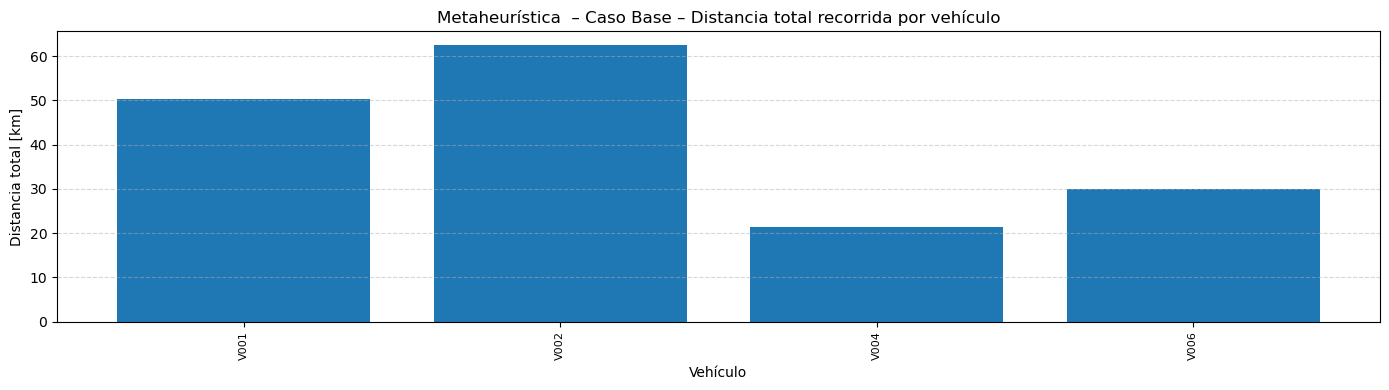

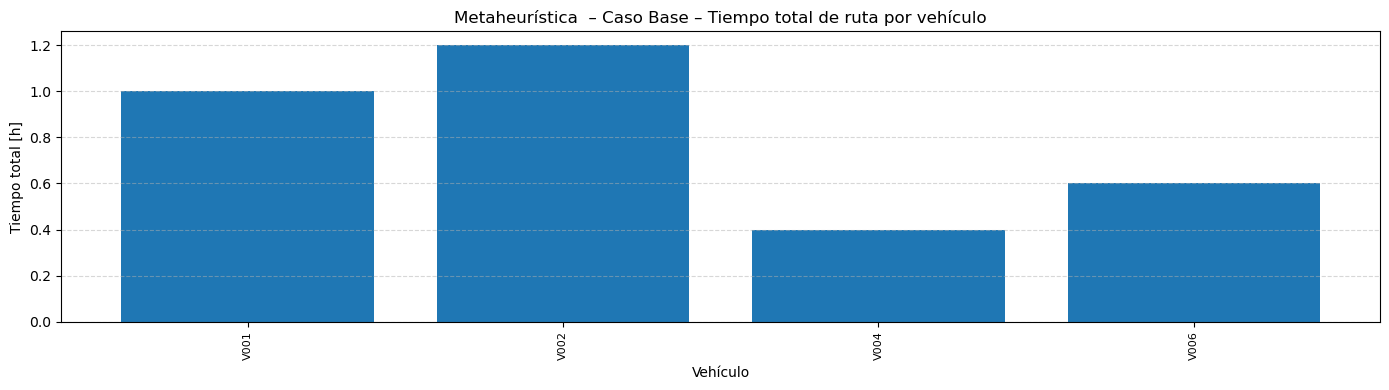

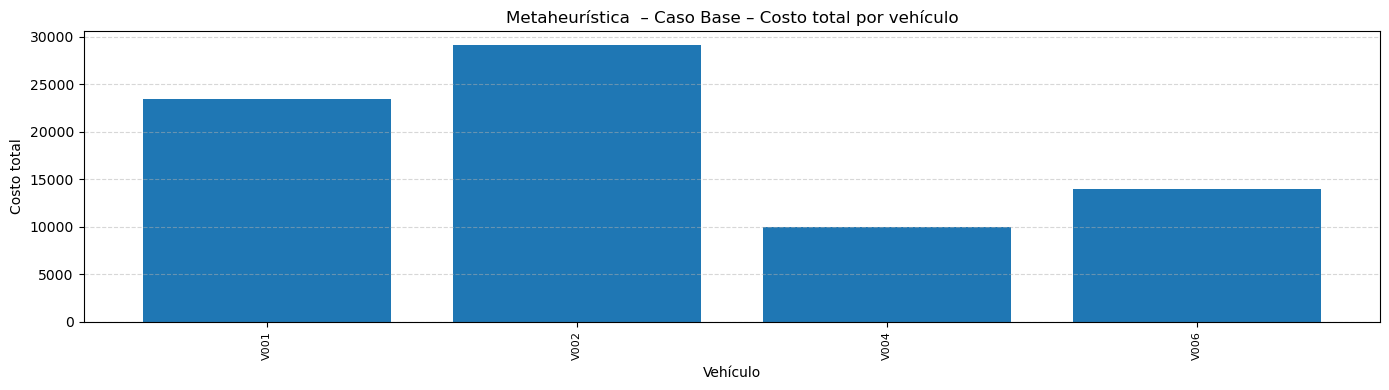

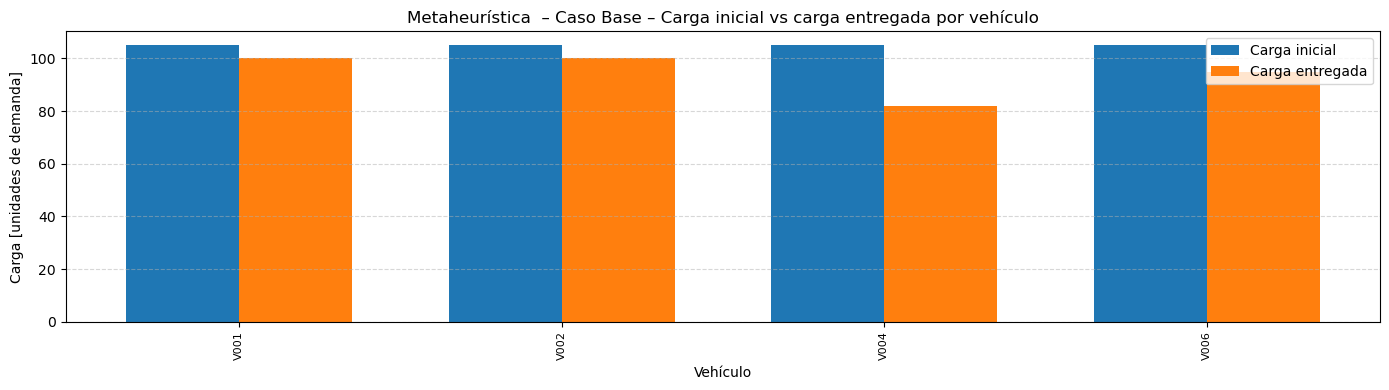

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_Base.html


In [14]:
C_fixed_A, C_dist_A, C_time_A, C_fuel_A = get_cost_parameters(parameters_C2)

demands_CB = dict(zip(clients_CB["LocationID"], clients_CB["Demand"]))

dist_df_CB      = pd.read_csv("Proyecto_Caso_Base/dist_matrix_CB.csv", index_col=0)
dist_matrix_CB  = dist_df_CB.values
num_nodes_CB    = dist_matrix_CB.shape[0]
num_vehicles_CB = len(vehicles_CB)

depot_id_CB = depots_CB["StandardizedID"].iloc[0]   
idx_to_label_CB = build_idx_to_label_map(dist_df_CB)

def build_ga_case_base(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_CB,
        demands=demands_CB,
        vehicle_capacity=Q_base,          
        num_customers=num_nodes_CB,
        num_vehicles=num_vehicles_CB,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],                       
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

# 3 corridas independientes
resultados_base = run_ga_experiments(
    build_ga_case_base,
    n_runs=3,
    base_seed=100,
    verbose=True
)

# mejor corrida (por fitness)
best_row_CB  = resultados_base.loc[resultados_base["best_fitness"].idxmin()]
best_seed_CB = int(best_row_CB["seed"])

ga_best_CB = build_ga_case_base(best_seed_CB)
t0 = time.time()
ga_best_CB.solve(verbose=False)
cpu_time_best_CB = time.time() - t0

verif_GA_CB = build_verification_from_ga(
    ga=ga_best_CB,
    idx_to_label=idx_to_label_CB,
    vehicles_df=vehicles_CB,
    depot_label=depot_id_CB,
    avg_speed_kmh=50.0
)

verif_GA_CB = verif_GA_CB[verif_GA_CB["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_CB)
verif_GA_CB.to_csv("verificacion_metaheuristica_GA_A_casoBase.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_casoBase.csv",
    case_name="Metaheurística  – Caso Base",
    depots_df=depots_CB,     
    clients_df=clients_CB,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_Base.html"
)


#### Caso 2

Gen 0: best=639020.75, current=639020.75, time=0.0s
Gen 10: best=329892.05, current=329892.05, time=0.3s
Gen 20: best=296584.21, current=296584.21, time=0.7s
Gen 30: best=296584.21, current=296584.21, time=1.0s
Early stopping en gen 37
Terminado. Mejor fitness = 296584.21
Run 1 | seed=200 | best_fitness=296584.21 | time=1.19s
Gen 0: best=616705.31, current=616705.31, time=0.0s
Gen 10: best=342414.37, current=342414.37, time=0.3s
Gen 20: best=296584.21, current=296584.21, time=0.6s
Gen 30: best=296584.21, current=296584.21, time=0.8s
Early stopping en gen 32
Terminado. Mejor fitness = 296584.21
Run 2 | seed=201 | best_fitness=296584.21 | time=0.91s
Gen 0: best=478003.33, current=478003.33, time=0.0s
Gen 10: best=351838.42, current=351838.42, time=0.3s
Gen 20: best=296584.21, current=296584.21, time=0.6s
Gen 30: best=296584.21, current=296584.21, time=0.8s
Gen 40: best=296584.21, current=296584.21, time=1.0s
Early stopping en gen 40
Terminado. Mejor fitness = 296584.21
Run 3 | seed=202 |

,run,seed,best_fitness,cpu_time_sec
0,1,200,296584.208025,1.185571
1,2,201,296584.208025,0.910141
2,3,202,296584.208025,1.049001


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,68.0,CD01-C006-CD01-C005-C003-C008-C007-C009-CD01,7,68.0,50.5,1.0,23510.0
1,V002,CD01,68.0,CD01-C004-C002-CD01,2,21.0,12.6,0.3,5855.0


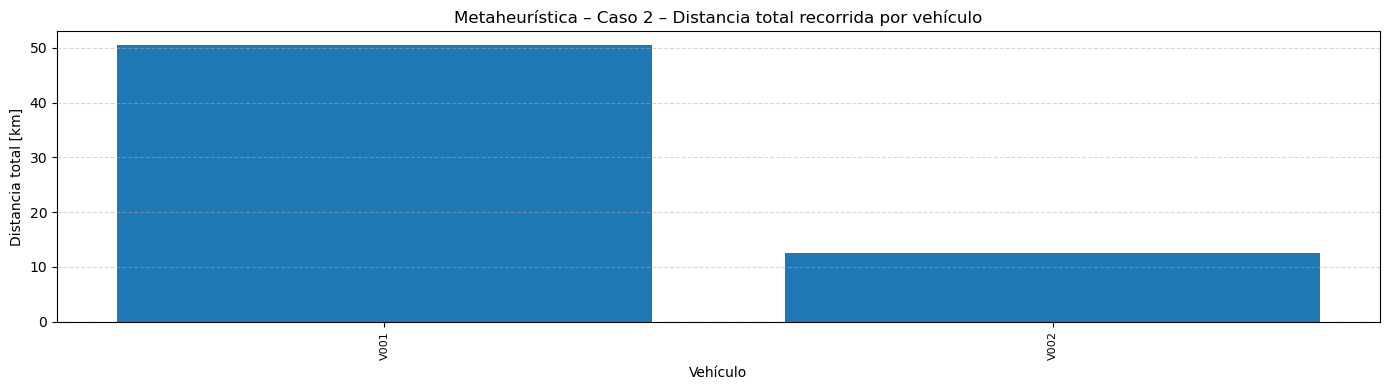

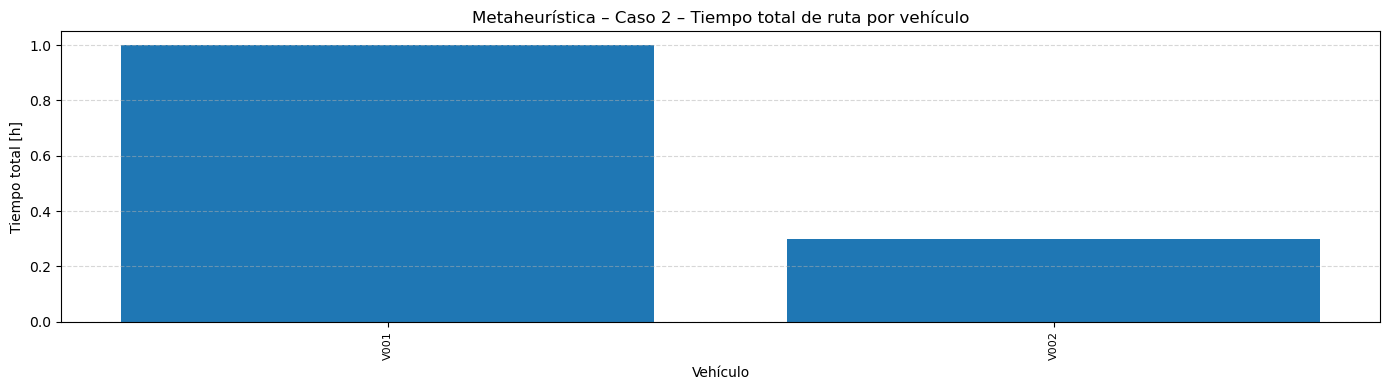

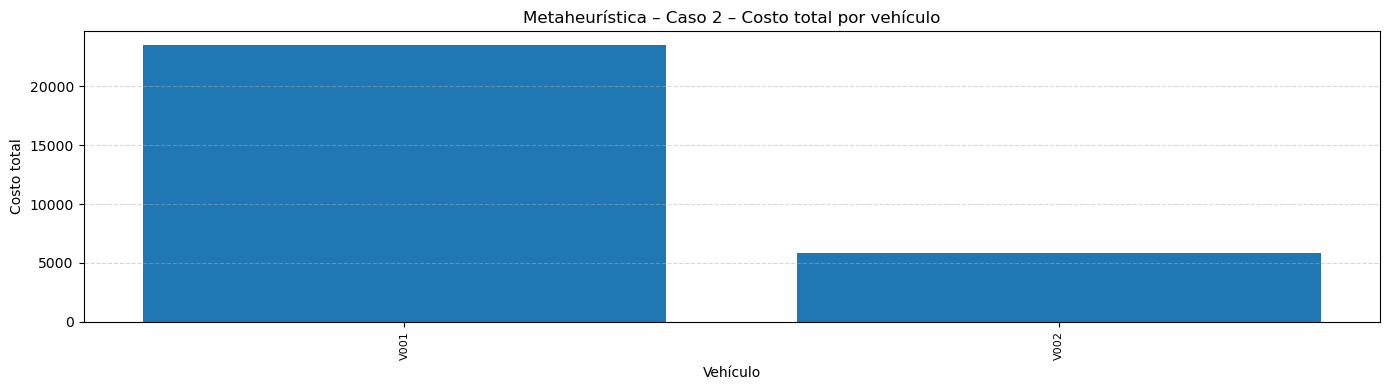

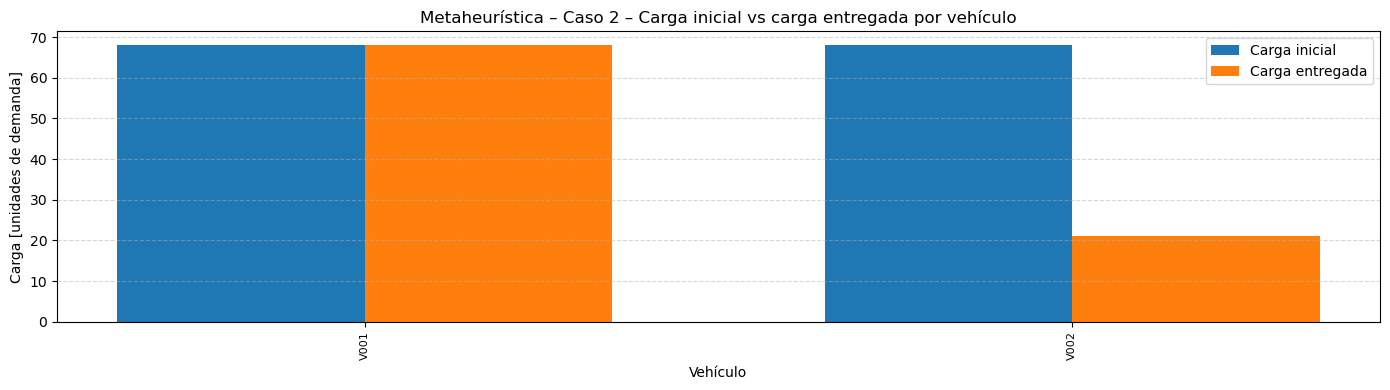

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_2.html


In [15]:
dist_df_C2      = pd.read_csv("Proyecto_A_Caso2/dist_matrix_C2.csv", index_col=0)
dist_matrix_C2  = dist_df_C2.values
num_nodes_C2    = dist_matrix_C2.shape[0]
num_vehicles_C2 = len(vehicles_C2)

idx_map_C2 = {label: i + 1 for i, label in enumerate(dist_df_C2.index)}

demands_C2 = {}
for _, row in clients_C2.iterrows():
    std_id = row["StandardizedID"]      
    ga_idx = idx_map_C2[std_id]        
    demands_C2[ga_idx] = float(row["Demand"])
depot_id_C2 = depots_CB["StandardizedID"].iloc[0]  
idx_to_label_C2 = build_idx_to_label_map(dist_df_C2)

def build_ga_case2(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_C2,
        demands=demands_C2,
        vehicle_capacity=Q_2,
        num_customers=num_nodes_C2,
        num_vehicles=num_vehicles_C2,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

resultados_C2 = run_ga_experiments(
    build_ga_case2,
    n_runs=3,
    base_seed=200,
    verbose=True
)

best_row_C2  = resultados_C2.loc[resultados_C2["best_fitness"].idxmin()]
best_seed_C2 = int(best_row_C2["seed"])

ga_best_C2 = build_ga_case2(best_seed_C2)
t0 = time.time()
ga_best_C2.solve(verbose=False)
cpu_time_best_C2 = time.time() - t0

verif_GA_C2 = build_verification_from_ga(
    ga=ga_best_C2,
    idx_to_label=idx_to_label_C2,
    vehicles_df=vehicles_C2,
    depot_label=depot_id_C2,
    avg_speed_kmh=50.0
)

verif_GA_C2 = verif_GA_C2[verif_GA_C2["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_C2)
verif_GA_C2.to_csv("verificacion_metaheuristica_GA_A_caso2.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_caso2.csv",
    case_name="Metaheurística – Caso 2",
    depots_df=depot_C2,     
    clients_df=clients_C2,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_2.html"
)


#### Caso 3

Gen 0: best=6259158.97, current=6259158.97, time=0.6s
Gen 10: best=5928694.46, current=5928694.46, time=5.9s
Gen 20: best=5644107.55, current=5644107.55, time=11.6s
Gen 30: best=5409519.11, current=5409519.11, time=16.9s
Gen 40: best=4976294.77, current=4976294.77, time=22.2s
Gen 50: best=4829824.49, current=4829824.49, time=27.4s
Gen 60: best=4638556.38, current=4638556.38, time=32.5s
Gen 70: best=4532178.53, current=4532178.53, time=37.5s
Gen 80: best=4348115.06, current=4348115.06, time=42.5s
Gen 90: best=4212130.10, current=4212130.10, time=47.4s
Gen 100: best=4117975.54, current=4117975.54, time=52.3s
Gen 110: best=4005095.25, current=4005095.25, time=57.1s
Stopped by time limit: 60.3s (gen 114)
Terminado. Mejor fitness = 4000231.40
Run 1 | seed=300 | best_fitness=4000231.40 | time=60.41s
Gen 0: best=6179963.57, current=6179963.57, time=0.6s
Gen 10: best=5864926.81, current=5864926.81, time=6.3s
Gen 20: best=5643984.25, current=5643984.25, time=11.9s
Gen 30: best=5328961.60, curre

,run,seed,best_fitness,cpu_time_sec
0,1,300,4.000231e+06,60.405889
1,2,301,4.150000e+06,60.260487
2,3,302,4.154484e+06,60.087140


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,83.0,CD01-C056-C027-C053-C054-C028-CD01,5,60.0,30.6,0.6,14273.0
1,V003,CD01,83.0,CD01-C057-C041-C081-C067-C078-CD01,5,66.0,28.8,0.6,13419.0
2,V005,CD01,83.0,CD01-C035-CD01,1,12.0,22.4,0.4,10424.0
3,V006,CD01,83.0,CD01-C038-C034-C016-C051-C087-CD01,5,62.0,27.6,0.6,12843.0
4,V007,CD01,83.0,CD01-C023-C037-C022-C088-C048-C013-CD01,6,75.0,33.5,0.7,15594.0
5,V008,CD01,83.0,CD01-C070-C083-C086-C024-C050-CD01,5,56.0,38.8,0.8,18058.0
6,V009,CD01,83.0,CD01-C011-C005-C077-C031-C044-C032-CD01,6,51.0,42.6,0.9,19831.0
7,V010,CD01,83.0,CD01-C071-C058-C009-CD01,3,24.0,28.0,0.6,13060.0
8,V011,CD01,83.0,CD01-C015-C080-C025-C018-C060-CD01,5,67.0,40.3,0.8,18780.0
9,V012,CD01,83.0,CD01-C021-C020-C012-CD01,3,48.0,27.1,0.5,12623.0


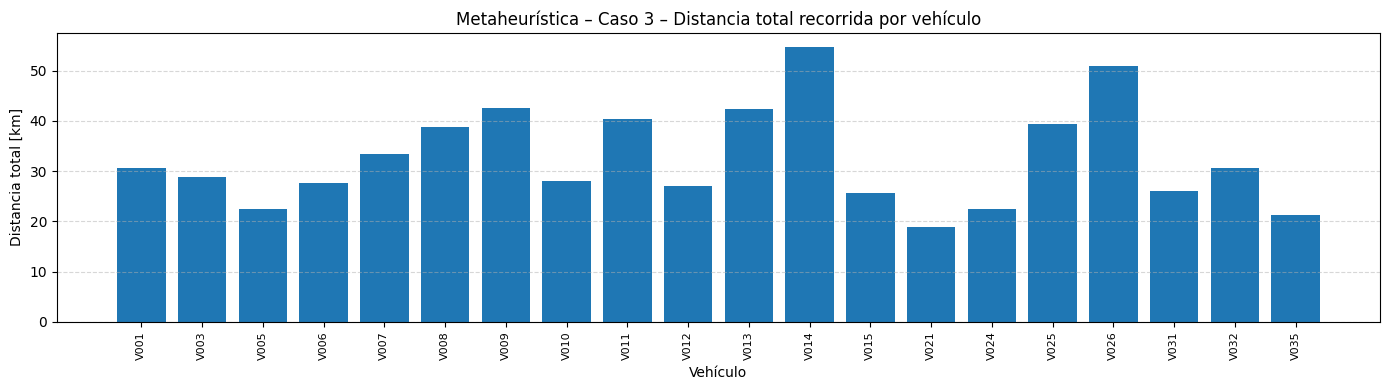

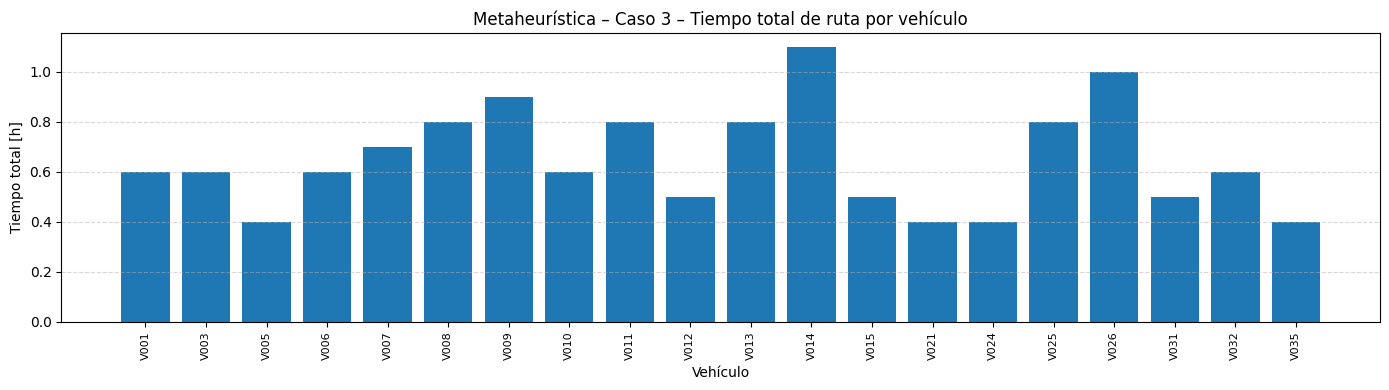

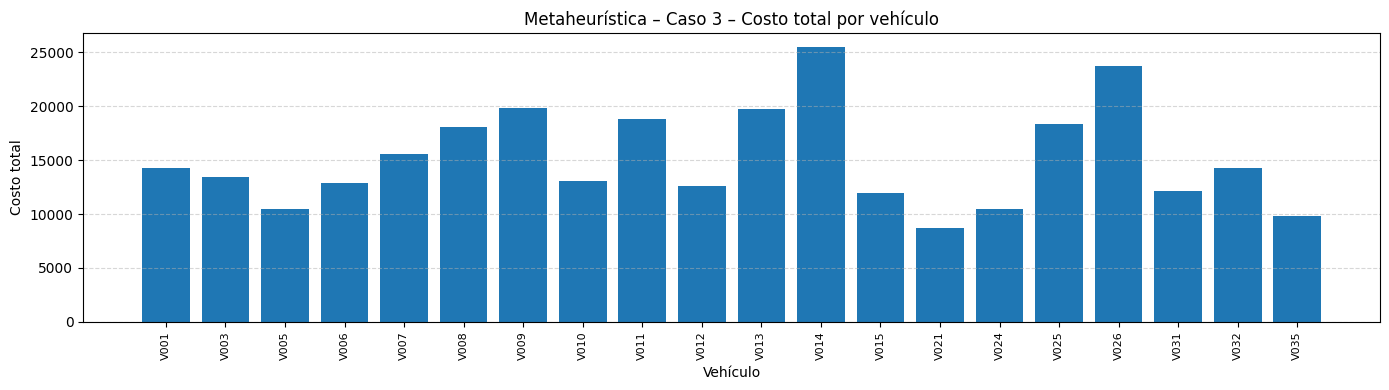

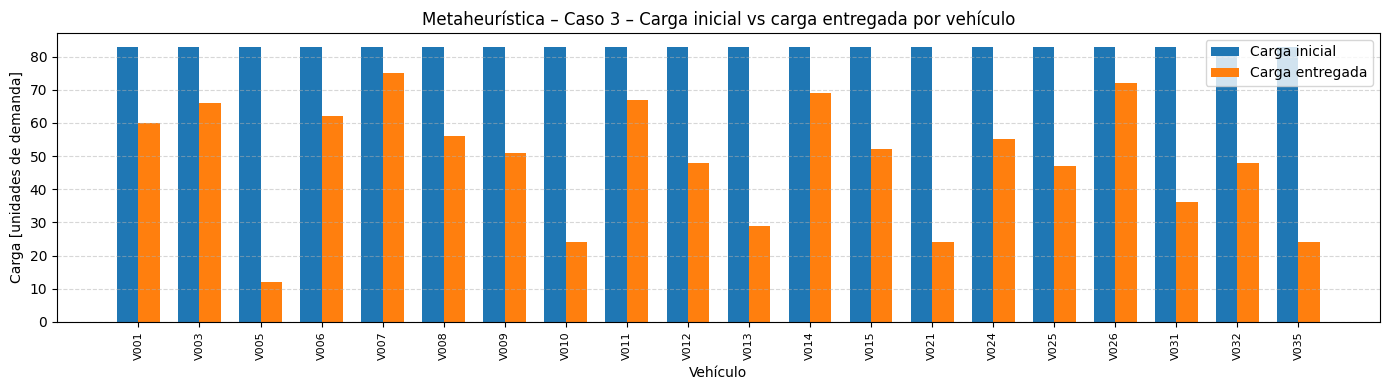

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_3.html


In [ ]:
demands_C3 = dict(zip(clients_C3["LocationID"], clients_C3["Demand"]))

dist_df_C3      = pd.read_csv("Proyecto_A_Caso3/dist_matrix_C3.csv", index_col=0)
dist_matrix_C3  = dist_df_C3.values
num_nodes_C3    = dist_matrix_C3.shape[0]
num_vehicles_C3 = len(vehicles_C3)

depot_id_C3 = depots_CB["StandardizedID"].iloc[0]   
idx_to_label_C3 = build_idx_to_label_map(dist_df_C3)

def build_ga_case3(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_C3,
        demands=demands_C3,
        vehicle_capacity=Q_3,
        num_customers=num_nodes_C3,
        num_vehicles=num_vehicles_C3,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

resultados_C3 = run_ga_experiments(
    build_ga_case3,
    n_runs=3,
    base_seed=300,
    verbose=True
)

best_row_C3  = resultados_C3.loc[resultados_C3["best_fitness"].idxmin()]
best_seed_C3 = int(best_row_C3["seed"])

ga_best_C3 = build_ga_case3(best_seed_C3)
t0 = time.time()
ga_best_C3.solve(verbose=False)
cpu_time_best_C3 = time.time() - t0

verif_GA_C3 = build_verification_from_ga(
    ga=ga_best_C3,
    idx_to_label=idx_to_label_C3,
    vehicles_df=vehicles_C3,
    depot_label=depot_id_C3,
    avg_speed_kmh=50.0
)

verif_GA_C3 = verif_GA_C3[verif_GA_C3["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_C3)
verif_GA_C3.to_csv("verificacion_metaheuristica_GA_A_caso3.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_caso3.csv",
    case_name="Metaheurística – Caso 3",
    depots_df=depot_C3,     
    clients_df=clients_C3,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_3.html"
)


## Discusión

La implementación pyomo garantiza (o se aproxima fuertemente) a soluciones óptimas, lo que da una referencia clara para evaluar la calidad de cualquier metaheurística. Además, el modelo exacto produce rutas más compactas y un uso eficiente de la flota en el caso base, concentrando los clientes en menos vehículos con distancias totales más bajas que las del GA. Sin embargo, el costo de esta calidad es elevado en tiempo de cómputo, el caso base requiere un MIP grande con miles de variables binarias y una corrida de varios minutos, lo que hace poco viable este enfoque para instancias urbanas más grandes como el caso 3. Por otro lado, el algoritmo genético encuentra soluciones factibles de buena calidad en tiempos significativamente menores y con una estructura de implementación flexible que facilita ajustar operadores, penalizaciones y parámetros. En el caso base el GA genera rutas con distancias algo mayores y más vehículos utilizados frente al modelo exacto, reflejando una ligera diferencia en costo y en eficiencia de la flota. Sin embargo, en el caso 3 el GA logra atender a todos los clientes distribuyendo la carga en múltiples vehículos, manteniendo distancias por vehículo razonables y costos totales manejables, donde un enfoque exacto sería muy difícil de resolver en tiempos académicamente aceptables.

Para instancias de tamaño pequeño o moderado, se recomienda usar la implementación pyomo para obtener una solución de referencia y entender la estructura óptima de las rutas y el uso de la flota. Esta solución base permite ayudar a calibrar el Algoritmo Genético, estimar el gap típico y justificar que la metaheurística está ofreciendo soluciones suficientemente cercanas al óptimo en términos de costo, distancia y número de vehículos. En escenarios grandes, dinámicos o cuando se requieren muchas ejecuciones, se recomienda priorizar el Algoritmo Genético como herramienta principal de decisión. El GA demostró capacidad para construir rutas factibles en el caso 3, repartiendo los clientes en más de veinte vehículos, con distancias por ruta y costos de combustible que se mantienen en rangos operativamente realistas, lo que lo hace adecuado para planificación táctica en contextos urbanos complejos. Una estrategia razonable es usar el modelo exacto solo en instancias representativas pequeñas para recalibrar periódicamente el GA y validar el desempeño.

En cuanto a desafíos presentados, la implementación pyomo presentó tiempos de resolución crecientes y dificultades para escalar, lo que obliga a fijar límites de tiempo y aceptar soluciones con gap no nulo en instancias de mayor tamaño. El Algoritmo Genético, a pesar de su escalabilidad requiere un proceso iterativo de ajuste de parámetros (tamaño de población, número de generaciones, probabilidad de mutación, selección de semillas) para estabilizar los resultados y reducir la variabilidad entre corridas, así como posibles extensiones con búsqueda local para mejorar la calidad final de las rutas.
